# **Natural Language Processing - Twitter US Airline Sentiment Analysis.  - By David Salako.**

<br>

## **Background and Context.**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there is so much information that it is difficult for brands to quickly detect negative social mentions that could harm their business.

Sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what is being said about their brand and their competitors, and discover new trends in the industry.

<br>

## **Objective.**
To implement the techniques learned as a part of the course with the following learning outcomes:

    * Basic understanding of text pre-processing.
    * What to do after text pre-processing
    * Bag of words
    * Tf-idf
    * Build the classification model.
    * Evaluate the Model

<br>

## **Dataset.**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

<br>

The dataset has the following columns:

    * tweet_id                                                           
    * airline_sentiment                                               
    * airline_sentiment_confidence                               
    * negativereason                                                   
    * negativereason_confidence
    * airline                                    
    * airline_sentiment_gold                                              
    * name     
    * negativereason_gold 
    * retweet_count
    * text
    * tweet_coord
    * tweet_created
    * tweet_location 
    * user_timezone

There are 14,640 rows and 15 columns. 

## **Importing the libraries.**

In [ ]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Loading the data from a .csv file into a pandas dataframe.

df_Tweets_Orig = pd.read_csv("Tweets.csv")
df_Tweets_Orig.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Make a copy of the original dataframe to work on.

df_Tweets = df_Tweets_Orig.copy()

In [ ]:
# View a random sampling of the rows of records.

df_Tweets.sample(n=75, random_state=1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8515,568198336651649027,positive,1.0000,NaN,NaN,Delta,NaN,GenuineJack,NaN,0,@JetBlue I'll pass along the advice. You guys ...,NaN,2015-02-18 16:00:14 -0800,Massachusetts,Central Time (US & Canada)
3439,568438094652956673,negative,0.7036,Lost Luggage,0.7036,United,NaN,vina_love,NaN,0,@united I sent you a dm with my file reference...,NaN,2015-02-19 07:52:57 -0800,ny,Quito
6439,567858373527470080,positive,1.0000,NaN,NaN,Southwest,NaN,Capt_Smirk,NaN,0,@SouthwestAir Black History Commercial is real...,NaN,2015-02-17 17:29:21 -0800,La Florida,Eastern Time (US & Canada)
5112,569336871853170688,negative,1.0000,Late Flight,1.0000,Southwest,NaN,scoobydoo9749,NaN,0,@SouthwestAir why am I still in Baltimore?! @d...,"[39.1848041, -76.6787131]",2015-02-21 19:24:22 -0800,"Tallahassee, FL",America/Chicago
5645,568839199773732864,positive,0.6832,NaN,NaN,Southwest,NaN,laurafall,NaN,0,@SouthwestAir SEA to DEN. South Sound Volleyba...,NaN,2015-02-20 10:26:48 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,569532394455359488,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,storylaura,NaN,0,@USAirways this is the worst customer service ...,NaN,2015-02-22 08:21:18 -0800,"kansas city, mo",Eastern Time (US & Canada)
3357,568502194854612992,negative,0.6528,Bad Flight,0.3280,United,NaN,rick4tkins,NaN,0,@united tried that already &amp; tried forgett...,NaN,2015-02-19 12:07:40 -0800,NaN,NaN
5938,568470266793340929,negative,1.0000,Customer Service Issue,0.6665,Southwest,NaN,CeceliaNBrady,NaN,1,@SouthwestAir 3 flights yesterday; no treats ...,NaN,2015-02-19 10:00:47 -0800,NaN,Eastern Time (US & Canada)
4316,567634106058821632,neutral,1.0000,NaN,NaN,United,NaN,gwaki,NaN,0,@united even though technically after I land I...,NaN,2015-02-17 02:38:11 -0800,NaN,Central Time (US & Canada)


## **Exploratory Data Analysis (EDA).**

In [ ]:
df_Tweets.shape    # Print the shape of the dataset.

(14640, 15)

**Observation:**
<br>
The dataset has 15 columns and 14640 rows of data. 

In [ ]:
df_Tweets.info() # Information of all columns in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Observation:**
<br>
There are lots of nulls present in the attributes:
* negativereason
* negativereason_confidence
* airline_sentiment_gold
* negativereason_gold
* tweet_coord
* tweet_location
* user_timezone


In [ ]:
# View some basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 

df_Tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df_Tweets.isnull().sum(axis=0)          # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Observation:**
<br>
Null counts in the fields as stated earlier above.

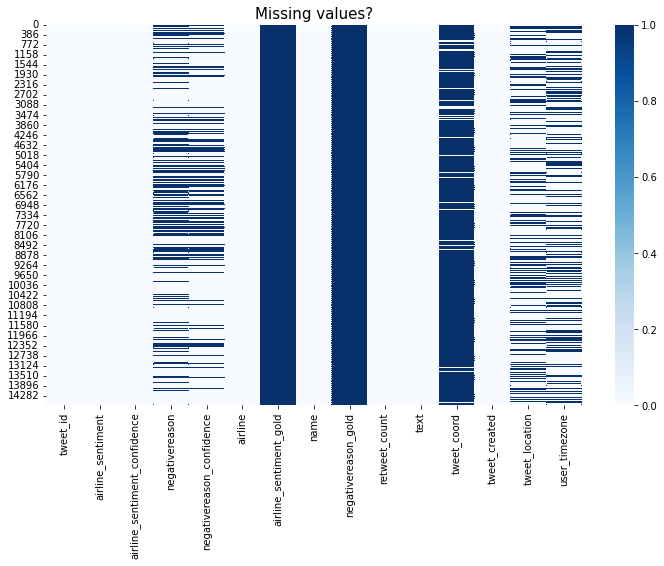

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df_Tweets.isnull(), cmap = "Blues")                        # Visualization of missing value using heatmap.
plt.title("Missing values?", fontsize = 15)
plt.show()

**Observations:**
* The lines in the above heatmap help visualize the location of missing values (i.e. the missing value indexes in the dataframe).
* The following columns have so many missing values that their data is probably of little relevance: airline_sentiment_gold, negativereason_gold, and tweet_coord.
* The columns negative_reason, negative_reason_confidence, tweet_location, and user_timezone have missing values ranging in the 4000s and 5000s.

In [ ]:
# Check the missing values for all the columns.

def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

# Plot the count of missing values in every column.

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Get the count of missing values in every column of the dataframe.

return_missing_values(df_Tweets)

negativereason_confidence     4118
tweet_location                4733
user_timezone                 4820
negativereason                5462
tweet_coord                  13621
airline_sentiment_gold       14600
negativereason_gold          14608
dtype: int64

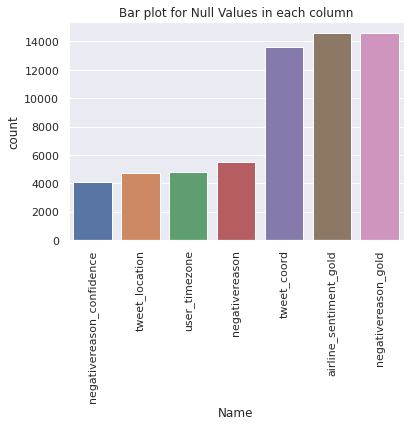

In [ ]:
# Plotting the count of missing values.

plot_missing_values(df_Tweets)

**Observations:**

The additional table and graph further illustrate the earlier observations regarding missing values.

In [ ]:
# Get the unique values of every column.

def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
# How many unique values are there in each attribute/column?

unidf = return_unique_values(df_Tweets)
print(unidf)

                        Features  Uniques
0                       tweet_id    14485
1              airline_sentiment        3
2   airline_sentiment_confidence     1023
3                 negativereason       10
4      negativereason_confidence     1410
5                        airline        6
6         airline_sentiment_gold        3
7                           name     7701
8            negativereason_gold       13
9                  retweet_count       18
10                          text    14427
11                   tweet_coord      832
12                 tweet_created    14247
13                tweet_location     3081
14                 user_timezone       85


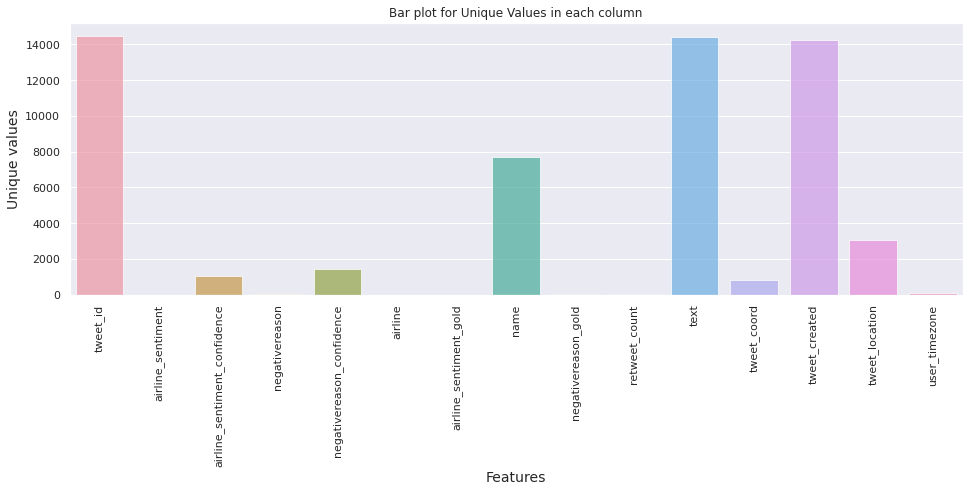

In [ ]:
# Plot the count of unique values in every column.

f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

**Observations:**

A visualization of the number of unique values in each column. Tweet_id has the most because each tweet is uniquely identified which is most likely of not much value in the model building excercise.


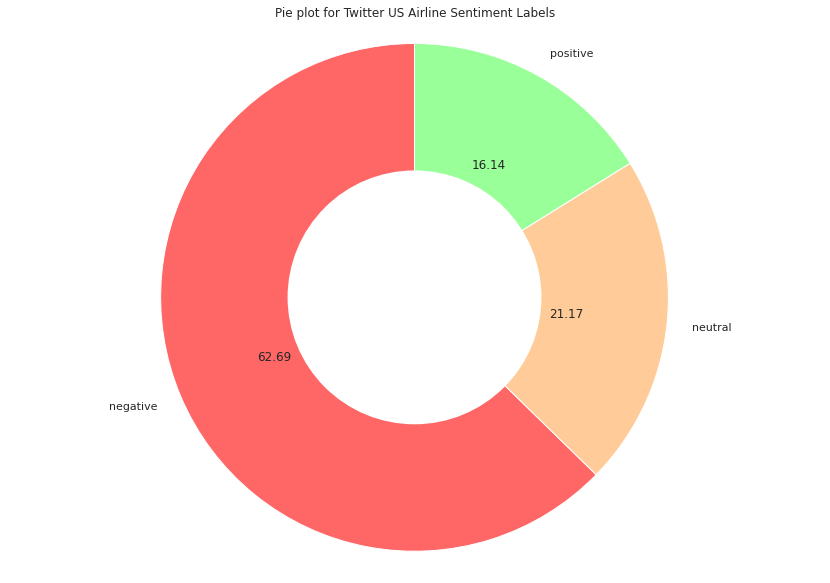

In [ ]:
# Plot for Twitter US Airline Sentiment Labels using matplotlib.

colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(df_Tweets['airline_sentiment'].value_counts(), labels=df_Tweets['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Twitter US Airline Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Observations:**

* Approximately 16% of the tweets are positive in nature.
* The majority of the tweets are negative in nature at 62.7%, almost two-thirds.
* 21.2% of the tweets are deemed neutral in nature.

In [ ]:
# Count number of each type of tweet.

df_Tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# A function to create labeled barplots.

def labeled_barplot(df_Tweets, feature,  title, pallet,perc=True, n=None):
    """
    Barplot with percentage at the top

    df_Tweets: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df_Tweets[feature])  # length of the column
    count = df_Tweets[feature].nunique()
    if n is None:
        plt.figure(figsize=(16, 4))
    else:
        plt.figure(figsize=(16, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        df_Tweets[feature],
        palette=pallet,
        order=df_Tweets[feature].value_counts().index[:20],
    )
    ax.set_title('Frequency of {} tweeting about US Airlines'.format(title))

    for p in ax.patches:
        if perc == True:
            label = "{:1.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Airlines arranged by number of tweets.**

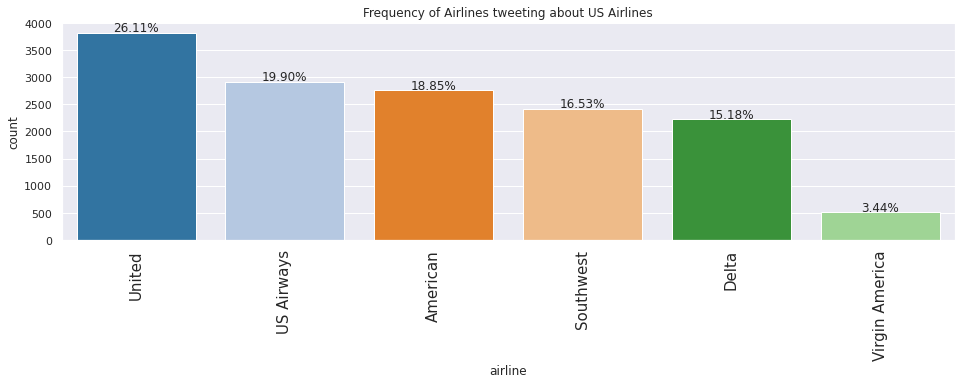

In [ ]:
# Visualize the top 20 users by number of tweets.

labeled_barplot(df_Tweets, 'airline', 'Airlines','tab20')

**Observations:**
* United is the airline most tweeted about in February 2015 at just over 25% of the total number of tweets overall.
* There are only 6 airlines tweeted about in this dataset and for this timeframe.
* Virgin America is the least tweeted about but it is also the airline with the smallest flight network footprint compared to the other 5 large airlines.
* Southwest is the only lowcost airline among the 6 airlines in this dataset.

### **Top 20 users by number of tweets.**

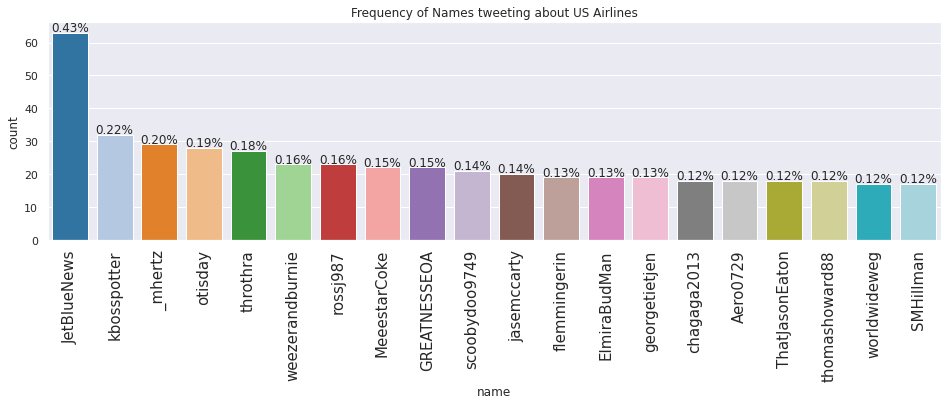

In [ ]:
# Visualize the top 20 users by number of tweets.

labeled_barplot(df_Tweets, 'name', 'Names','tab20')

**Observations:**

* JetBlueNews (0.43%) is the name that has the highest number of tweets in this particular dataset.
* Kbosspotter (0.22%), _mhertz (0.20%), otisday (0.19%), and throthra (0.18%) come in at second, third, fourth, and fifth place respectively.
* The relatively low percentages demonstrate that there are a lot of names that tweet in this US Airline dataset.

### **Top 20 user locations based on the number of tweets.**

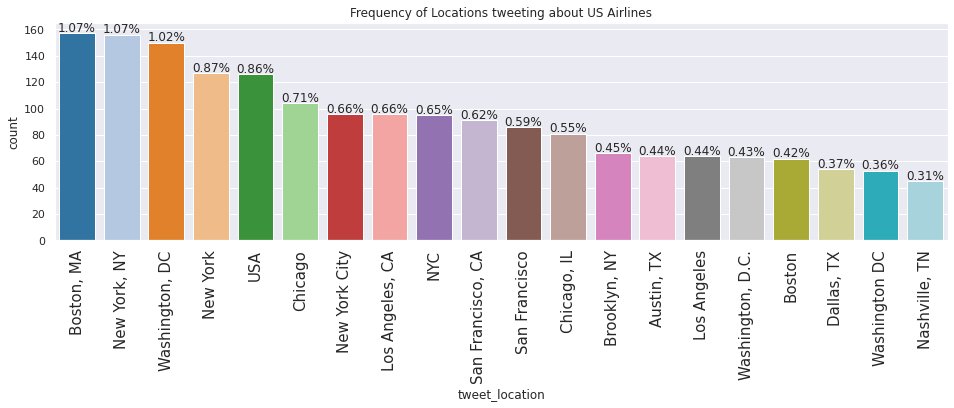

In [ ]:
# Visualize the top 20 sources by number of tweets.

labeled_barplot(df_Tweets, 'tweet_location','Locations', 'tab20')

**Observations:** 
* As we can see in the above all the locations were not in the format of city, state abbreviation.
* We take top 50 user locations with more number of tweets try to make the format into city, state abbreviation.

In [ ]:
# Take the top 500 user locations based on no of tweets.

dt = df_Tweets['tweet_location'].value_counts().reset_index()  # Get the counts of tweets which contains a fixed no of hashtags.
dt.columns = ['tweet_location', 'count'] 
dt = dt.sort_values(['count'],ascending=False)[:50] # Top 50 places.
dt.head()

,tweet_location,count
0,"Boston, MA",157
1,"New York, NY",156
2,"Washington, DC",150
3,New York,127
4,USA,126


In [ ]:
# Try to make the format into city, state abbreviation for the top 50 places with more number of tweets.

city = []
state = []
for i in dt['tweet_location']:
  loc = i.split(',')
  if len(loc)>1:   # If it has more than one token.
    city.append(loc[0])
    state.append(loc[1])
  else:
    city.append('other') # If number of tokens is 1 then we keep it as other.
    state.append('other')

dt['city'] = city
dt['state'] = state
dictionary = dict(zip(dt['city'], dt['state']))  # Create a dictionary with key as city and value maps to its state.
dt.head()

,tweet_location,count,city,state
0,"Boston, MA",157,Boston,MA
1,"New York, NY",156,New York,NY
2,"Washington, DC",150,Washington,DC
3,New York,127,other,other
4,USA,126,other,other


In [ ]:
# Get the final locations.

location = []

for i in dt['tweet_location']:
  loc = i.split(',')
  if len(loc)==2:  # If it has two tokens location will be same.
    location.append(loc[0]+','+loc[1])
  else:
    try:
      state = dictionary[loc[0]]  # Incase if only city is present we try to map it to the state from the above dataframe.
      location.append(loc[0]+','+state)
    except:
      location.append('other')  # If we cant find the map then we leave it.

dt["location"] = location
dt.head()

,tweet_location,count,city,state,location
0,"Boston, MA",157,Boston,MA,"Boston, MA"
1,"New York, NY",156,New York,NY,"New York, NY"
2,"Washington, DC",150,Washington,DC,"Washington, DC"
3,New York,127,other,other,"New York, New York"
4,USA,126,other,other,other


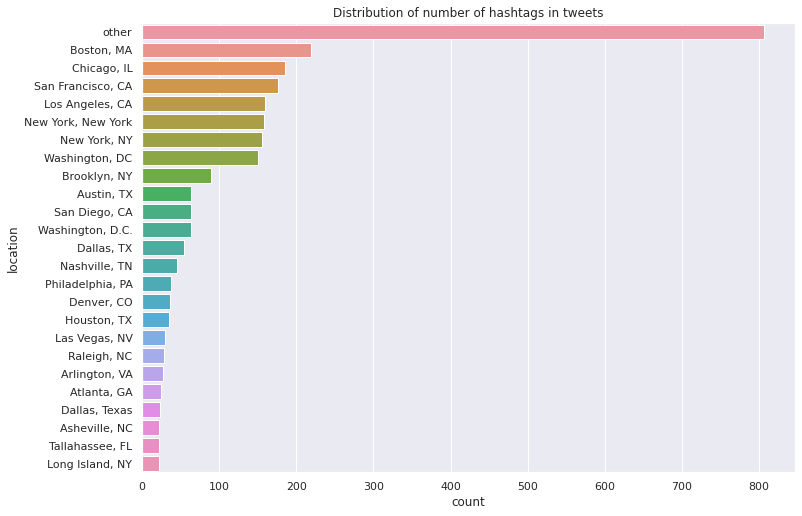

In [ ]:
# Get the count of tweets from every place.

ds = dt.groupby(['location']).sum().sort_values(by='count', ascending=False).reset_index()

# Get the plot with no of tweets contains x number of tags.
dt = ds

fig = sns.barplot( 
    x
    =dt["count"], 
    y=dt["location"], 
    orientation='horizontal'
).set_title('Distribution of number of hashtags in tweets')


**Observations:**

* There are thousands of tweets (the vast majority) where the user did not complete a coherent location that is easily interpreted by the programming languages. 
* Of the readable locations, the cities of Boston, Chicago, San Francisco, Los Angeles and New York have the highest number of tweet counts. This makes sense as these are major cities with very busy airports as well as airline hubs.

### **Year Created Distribution for Tweets about US Airlines.**

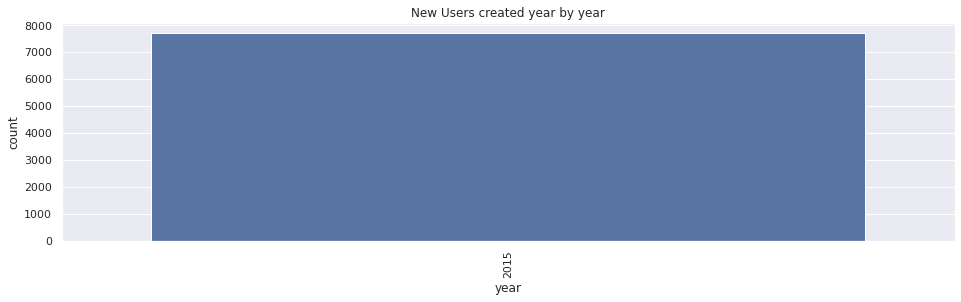

In [ ]:
# Number of new users created every year.

df_Tweets['tweet_created'] = pd.to_datetime(df_Tweets['tweet_created'])  # Change the format into datetime readable.
df_Tweets['year_created'] = df_Tweets['tweet_created'].dt.year   # Get the year where user is created.
date = df_Tweets.drop_duplicates(subset='name', keep="first")  # Remove duplicates.
date = date[date['year_created']>1970]   # Consider only user created affter 1970.
date = date['year_created'].value_counts().reset_index()   # Get the count of users created every year.
date.columns = ['year', 'number']
plt.figure(figsize=(16, 4))
fig = sns.barplot( 
    x=date["year"], 
    y=date["number"], 
    orientation='vertical'
).set_title('New Users created year by year')


plt.ylabel('count', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.xticks(rotation=90)
plt.show()

**Observation:**

As per the description of the dataset, all the tweets were generated in 2015 and specifically in the month of February.

### **Tweet distribution by day.**

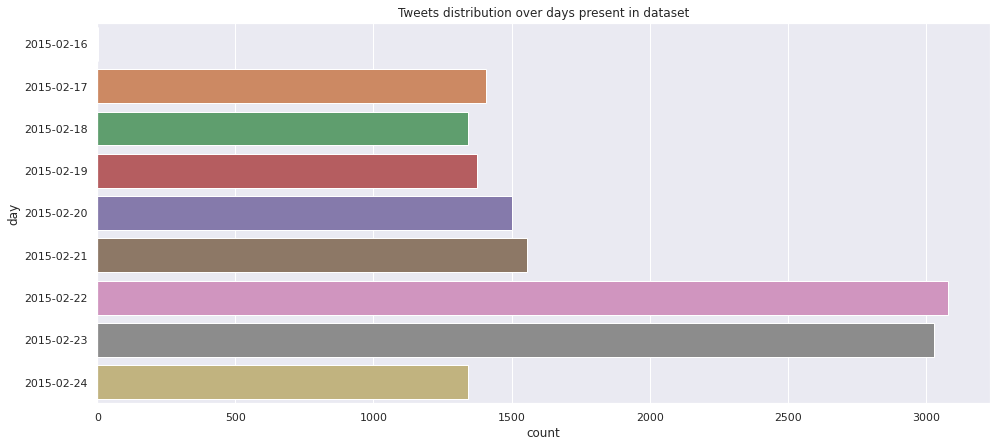

In [ ]:
df = df_Tweets.sort_values(['tweet_created'])
df['day'] = df['tweet_created'].astype(str).str.split(' ', expand=True)[0]
ds = df['day'].value_counts().reset_index()  # Get the count of no of tweets for every day.
ds.columns = ['day', 'count']
ds = ds.sort_values(['day'])

ds['day'] = ds['day'].astype(str)
plt.figure(figsize=(16, 7))
fig = sns.barplot( 
    x=ds['count'], 
    y=ds["day"], 
    orientation="horizontal",
).set_title('Tweets distribution over days present in dataset')

**Observations:** 
* February 22nd 2015 was the date with the most generated number of tweets at 3079.
* The following date of February 23rd 2015 generated the second highest number of tweets at 3028.
* Perhaps there was a signinificant event that affected the US airline industry on these two dates?

### **Hourly Tweet distribution.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

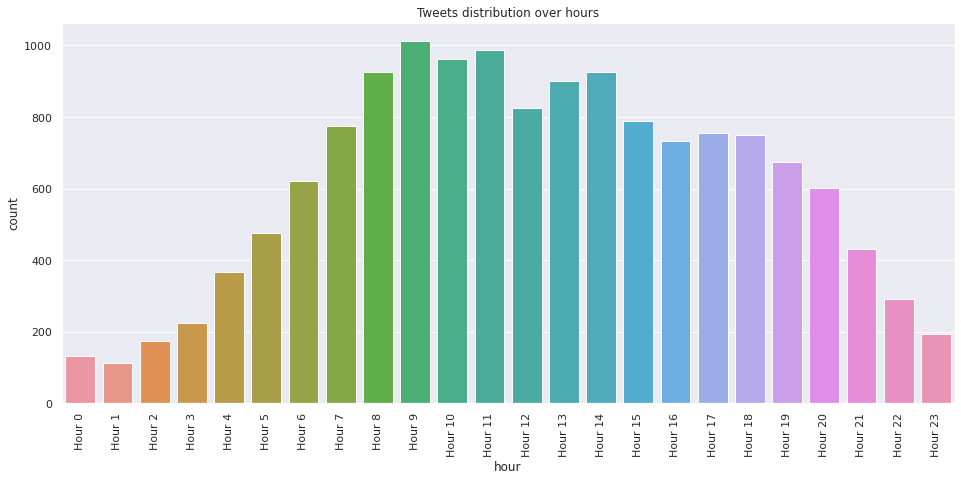

In [ ]:
df_Tweets['tweet_created'] = pd.to_datetime(df_Tweets['tweet_created']) # Change the format into datetime readable.
df_Tweets['hour'] = df_Tweets['tweet_created'].dt.hour    # Get the hour of every tweet.
ds = df_Tweets['hour'].value_counts().reset_index()  # Get the count of no of tweets for every hour.
ds.columns = ['hour', 'count']
ds = ds.sort_values(['hour'])
ds['hour'] = 'Hour ' + ds['hour'].astype(str)
plt.figure(figsize=(16, 7))
fig = sns.barplot( 
    x=ds["hour"], 
    y=ds["count"], 
    orientation='vertical', 
).set_title('Tweets distribution over hours')
plt.xticks(rotation='vertical')

**Observations:**

* The majority of tweets are sent during the peak travel hours of 7AM to 7PM which is when the highest number of US airline flights criss-cross the country.
* 9AM has the overall hihest number of tweets in the dataset with two other peaks (trimodal) at 11AM and 2PM respectively.
* 1AM is the hour with the least amount of tweets.

In [ ]:
# Get the no of words in every text.

df_Tweets['word_count'] = [len(t.split()) for t in df_Tweets.text]
df_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,year_created,hour,word_count
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015,11,4
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015,11,9
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015,11,12
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015,11,17
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015,11,10


In [ ]:
# Get the no of words in every text.

df_Tweets['word_count'] = [len(t.split()) for t in df_Tweets.text]
df_Tweets.head(100)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,year_created,hour,word_count
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015,11,4
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015,11,9
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015,11,12
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015,11,17
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,569910981868060673,negative,1.0000,Customer Service Issue,0.6863,Virgin America,NaN,MerchEngines,NaN,0,"@VirginAmerica Is it me, or is your website do...",NaN,2015-02-23 09:25:41-08:00,"Los Angeles, CA",Arizona,2015,9,22
96,569909224521641984,negative,1.0000,Customer Service Issue,0.6771,Virgin America,NaN,ColorCartel,NaN,0,@VirginAmerica I can't check in or add a bag. ...,NaN,2015-02-23 09:18:42-08:00,"Austin, TX",Mountain Time (US & Canada),2015,9,20
97,569907336485019648,negative,1.0000,Can't Tell,0.6590,Virgin America,NaN,MustBeSpoken,NaN,0,@VirginAmerica - Let 2 scanned in passengers l...,NaN,2015-02-23 09:11:12-08:00,NaN,NaN,2015,9,22
98,569896805611089920,negative,1.0000,Flight Booking Problems,0.6714,Virgin America,NaN,mattbunk,NaN,0,@virginamerica What is your phone number. I ca...,NaN,2015-02-23 08:29:21-08:00,"Sterling Heights, MI",Eastern Time (US & Canada),2015,8,16


# **Data Pre-processing (with user-defined functions).**

* Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a method to resolve such issues.

**Data Pre-processing steps:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Remove the URL's.
- Remove the mentions in the tweets('@').
- Tokenization.
- To remove Stopwords.
- Remove the punctuations.
- Remove the non-ASCII characters.
- Remove the hashtags.
- Lemmatized data.
- We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [ ]:
df_Tweets = df_Tweets[["text","airline_sentiment"]]

In [ ]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-truncated text column.)

df_Tweets.head(100)  

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
...,...,...
95,"@VirginAmerica Is it me, or is your website down? BTW, your new website isn't a great user experience. Time for another redesign.",negative
96,@VirginAmerica I can't check in or add a bag. Your website isn't working. I've tried both desktop and mobile http://t.co/AvyqdMpi1Y,negative
97,@VirginAmerica - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable,negative
98,@virginamerica What is your phone number. I can't find who to call about a flight reservation.,negative


In [ ]:
# Remove the html tags.

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

# Expand the contractions.

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Remove the numericals present in the text.

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# Remove the url's present in the text.

def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# Remove the mentions in the tweets.

def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
    
df_Tweets['text'] = df_Tweets['text'].apply(lambda x: clean_text(x))
df_Tweets.head(100)

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative
...,...,...
95,"Is it me, or is your website down? BTW, your new website is not a great user experience. Time for another redesign.",negative
96,I cannot check in or add a bag. Your website is not working. I have tried both desktop and mobile,negative
97,- Let scanned in passengers leave the plane than told someone to remove their bag from st class bin? #uncomfortable,negative
98,What is your phone number. I cannot find who to call about a flight reservation.,negative


In [ ]:
df_Tweets['text'] = df_Tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df_Tweets.head(100)

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative
...,...,...
95,"[Is, it, me, ,, or, is, your, website, down, ?, BTW, ,, your, new, website, is, not, a, great, user, experience, ., Time, for, another, redesign, .]",negative
96,"[I, can, not, check, in, or, add, a, bag, ., Your, website, is, not, working, ., I, have, tried, both, desktop, and, mobile]",negative
97,"[-, Let, scanned, in, passengers, leave, the, plane, than, told, someone, to, remove, their, bag, from, st, class, bin, ?, #, uncomfortable]",negative
98,"[What, is, your, phone, number, ., I, can, not, find, who, to, call, about, a, flight, reservation, .]",negative


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

# Remove the non-ASCII characters.

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# Convert all characters to lowercase.

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags.

def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations.

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words.

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# Lemmatize the words.

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df_Tweets['text'] = df_Tweets.apply(lambda row: normalize(row['text']), axis=1)

In [ ]:
df_Tweets.head(100)

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative
...,...,...
95,website btw new website great user experience time another redesign,negative
96,check add bag website work try desktop mobile,negative
97,let scan passengers leave plane tell someone remove bag st class bin uncomfortable,negative
98,phone number find call flight reservation,negative


**Observations:**
* The text in row 1 is categorized as a positive sentiment when in actual fact it is a negative tweet. The word "tacky" which can have more than one meaning is not being interpreted as a negative word in this context.


**Creating a Word Cloud for all the Tweets.**

In [ ]:
# Install the WordCloud library.

!pip install wordcloud

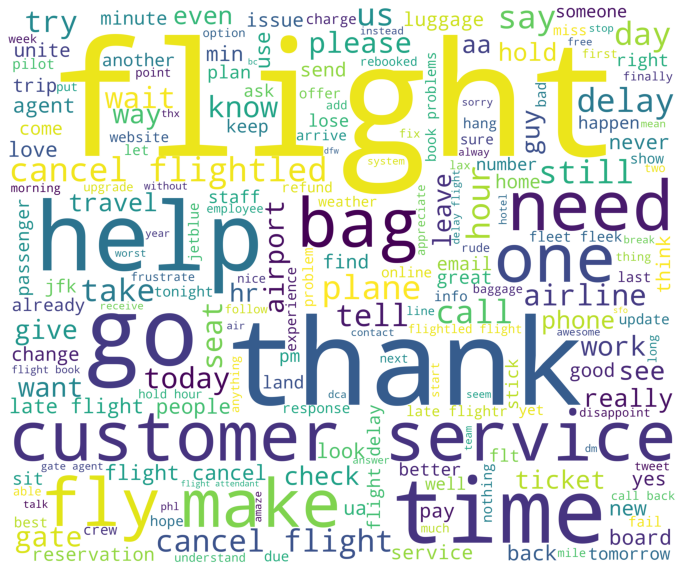

In [ ]:
# Importing all necessary modules. 

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
 
stopword_list = set(STOPWORDS) 

word_lists = df_Tweets['text']
unique_str  = ' '.join(word_lists)

# Generate_wordcloud(unique_str).

word_cloud = WordCloud(width = 3000, height = 2500, 
                       background_color ='white', 
                       stopwords = stopword_list, 
                       min_font_size = 10).generate(unique_str) 

# Visualize the WordCloud Plot.

# Set wordcloud figure size.

plt.figure(1,figsize=(12, 12)) 

# Show image.

plt.imshow(word_cloud) 

# Remove Axis.

plt.axis("off")  

# Show plot.

plt.show()


**Observations:**

Words like "flight", "thank", "help", "customer service", "bag", "time", "need", "make", and "fly" are the most frequently used in the overall dataset. 

**Word Cloud for Negative Tweets.**

In [ ]:
# Create a dataset of the negative tweets.

negative_tweets=df_Tweets[df_Tweets['airline_sentiment']=='negative']
word_lists_neg = ' '.join(negative_tweets['text'])

In [ ]:
# Set the display parameters for the word cloud.

wordcloud = WordCloud(stopwords=stopword_list,
                      background_color='red',
                      width=3000,
                      height=2500
                     ).generate(word_lists_neg)

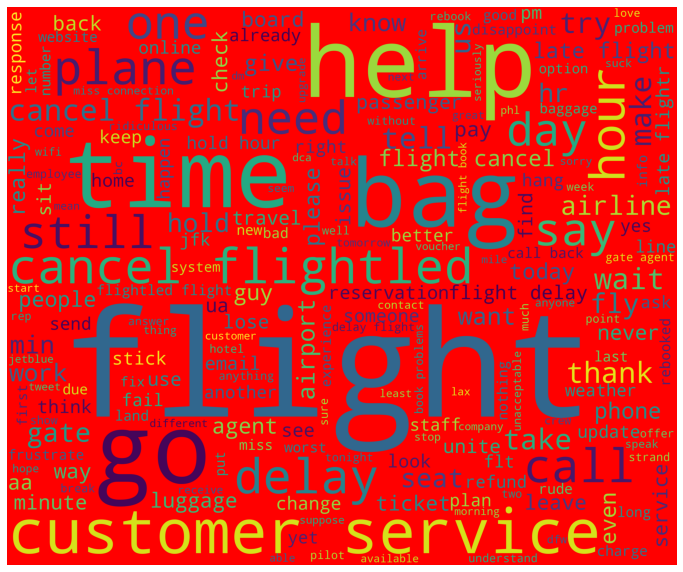

In [ ]:
# Display the word cloud.

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations:**

Amongst the negative tweets, the most frequent words are "flight", "time", "help", "bag", "customer service", "go", "cancel", "flightled", "delay" etc. 

**Word Cloud for Positive Tweets.**

In [ ]:
# Create a dataset of the positive tweets.

positive_tweets=df_Tweets[df_Tweets['airline_sentiment']=='positive']
word_lists_pos = ' '.join(positive_tweets['text'])

In [ ]:
# Set the display parameters for the word cloud.

wordcloud = WordCloud(stopwords=stopword_list,
                      background_color='green',
                      width=3000,
                      height=2500
                     ).generate(word_lists_pos)

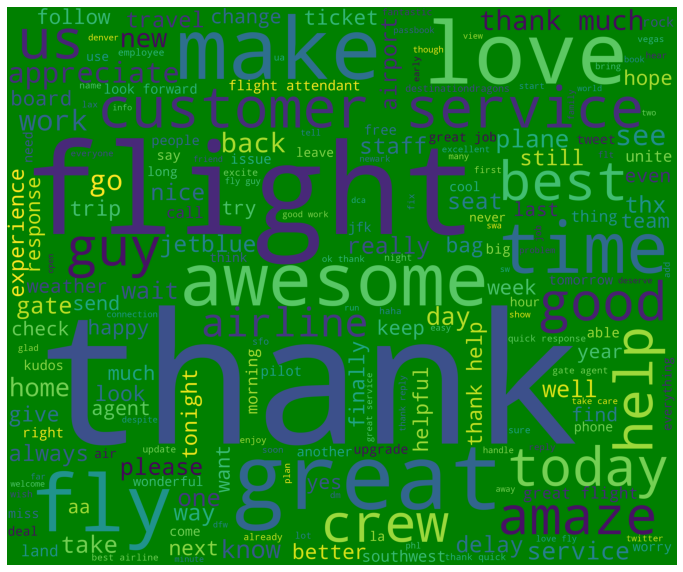

In [ ]:
# Display the word cloud.

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations:**

The positive tweets have frequent words apearing such as "flight", "great", "thank", "love", "awesome", "appreciate", "customer service", "fly", "amaze" etc.

**Word Cloud for Neutral Tweets.**

In [ ]:
# Create a dataset of the neutral tweets.

neutral_tweets=df_Tweets[df_Tweets['airline_sentiment']=='neutral']
word_lists_neu = ' '.join(neutral_tweets['text'])

In [ ]:
# Set the display parameters for the word cloud.

wordcloud = WordCloud(stopwords=stopword_list,
                      background_color='orange',
                      width=3000,
                      height=2500
                     ).generate(word_lists_neu)

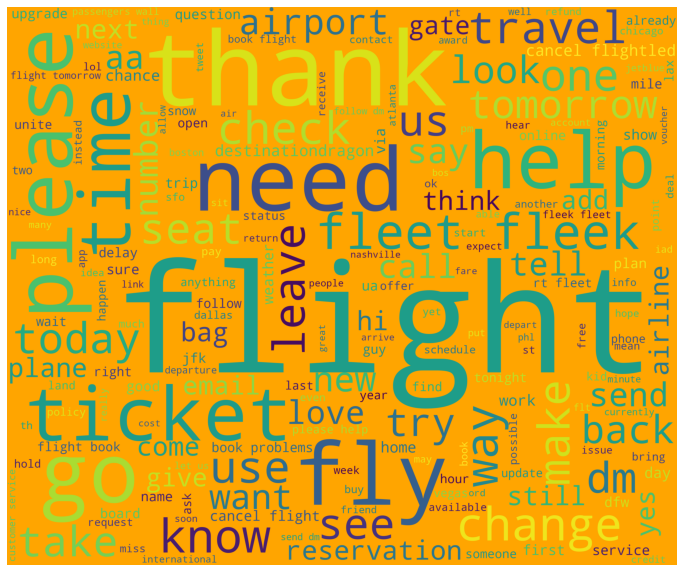

In [ ]:
# Display the word cloud.

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations:**

The neutral tweets have frequent words such as "flight", "thank", "fly", "need", "please", "go", "ticket" etc.

# **Data Pre-processing (with Keras).**

In [ ]:
# Import Keras libraries.


from keras.models import Model

from keras.layers import Input, LSTM, GRU, Dense, Embedding

from keras.preprocessing.text import Tokenizer

from sklearn.preprocessing import LabelBinarizer

from keras.layers import Activation, Dropout

from keras.models import Sequential

In [ ]:
df_Tweets_K = df_Tweets_Orig.copy()

In [ ]:
# Size of our dataset.

df_Tweets_K.shape

(14640, 15)

In [ ]:
# Look at the first 25 rows

df_Tweets_K.head(25)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


**Dividing the Keras dataset into train and test.**

In [ ]:
# Before we feed our data into Keras deep learning algorithms, we divided our data into training and test sets as shown below.

X = df_Tweets_K.iloc[:, 10].values

y = df_Tweets_K.iloc[:, 1].values

# The “iloc” function takes the index that we want to filter from our dataset. 
# Since our feature set will consist of tweet text, which is the 11th column, we passed 10 to the first iloc function. 
# Since column index starts from 0, therefore the 10th index corresponds to the 11th column. 
# Similarly, for labels, we pass the 1st index.

# Now variable X contains our feature set while the variable y contains our labels or the output.

**Text cleaning.**

In [ ]:
# Remove the html tags.

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

# Expand the contractions.

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Remove the numericals present in the text.

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# Remove the url's present in the text.

def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# Remove the mentions in the tweets.

def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
    
df_Tweets_K['text'] = df_Tweets_K['text'].apply(lambda x: clean_text(x))
df_Tweets_K.head(100)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you have added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I did not today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,569910981868060673,negative,1.0000,Customer Service Issue,0.6863,Virgin America,NaN,MerchEngines,NaN,0,"Is it me, or is your website down? BTW, your new website is not a great user experience. Time for another redesign.",NaN,2015-02-23 09:25:41 -0800,"Los Angeles, CA",Arizona
96,569909224521641984,negative,1.0000,Customer Service Issue,0.6771,Virgin America,NaN,ColorCartel,NaN,0,I cannot check in or add a bag. Your website is not working. I have tried both desktop and mobile,NaN,2015-02-23 09:18:42 -0800,"Austin, TX",Mountain Time (US & Canada)
97,569907336485019648,negative,1.0000,Can't Tell,0.6590,Virgin America,NaN,MustBeSpoken,NaN,0,- Let scanned in passengers leave the plane than told someone to remove their bag from st class bin? #uncomfortable,NaN,2015-02-23 09:11:12 -0800,NaN,NaN
98,569896805611089920,negative,1.0000,Flight Booking Problems,0.6714,Virgin America,NaN,mattbunk,NaN,0,What is your phone number. I cannot find who to call about a flight reservation.,NaN,2015-02-23 08:29:21 -0800,"Sterling Heights, MI",Eastern Time (US & Canada)


In [ ]:
df_Tweets_K['text'] = df_Tweets_K.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of the dataset.
df_Tweets_K.head(100)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[What, said, .]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[and, it, is, a, really, big, bad, thing, about, it]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,569910981868060673,negative,1.0000,Customer Service Issue,0.6863,Virgin America,NaN,MerchEngines,NaN,0,"[Is, it, me, ,, or, is, your, website, down, ?, BTW, ,, your, new, website, is, not, a, great, user, experience, ., Time, for, another, redesign, .]",NaN,2015-02-23 09:25:41 -0800,"Los Angeles, CA",Arizona
96,569909224521641984,negative,1.0000,Customer Service Issue,0.6771,Virgin America,NaN,ColorCartel,NaN,0,"[I, can, not, check, in, or, add, a, bag, ., Your, website, is, not, working, ., I, have, tried, both, desktop, and, mobile]",NaN,2015-02-23 09:18:42 -0800,"Austin, TX",Mountain Time (US & Canada)
97,569907336485019648,negative,1.0000,Can't Tell,0.6590,Virgin America,NaN,MustBeSpoken,NaN,0,"[-, Let, scanned, in, passengers, leave, the, plane, than, told, someone, to, remove, their, bag, from, st, class, bin, ?, #, uncomfortable]",NaN,2015-02-23 09:11:12 -0800,NaN,NaN
98,569896805611089920,negative,1.0000,Flight Booking Problems,0.6714,Virgin America,NaN,mattbunk,NaN,0,"[What, is, your, phone, number, ., I, can, not, find, who, to, call, about, a, flight, reservation, .]",NaN,2015-02-23 08:29:21 -0800,"Sterling Heights, MI",Eastern Time (US & Canada)


In [ ]:
# Tweets contain many special characters such as @, #, – etc. Similarly, there can be many empty spaces. 
# These special characters and empty spaces normally do not help in classification, 
# therefore we clean our text before using it for deep learning purposes.

# The following script performs text cleaning tasks.

df_Tweets_K['text'] = df_Tweets_K.apply(lambda row: normalize(row['text']), axis=1)


# The script above removes all the special characters from the tweets, 
# then removes single spaces from the beginning. 
# Then all the multiple spaces, generated as the result of removing special characters, 
# are removed. Finally, for the sake of uniformity, all the text is converted to lower case. 
# Regular expressions are used in the above script for text cleaning tasks. 


In [ ]:
# Divide our data into a training and test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Converting Text to Numbers:

<br>

Statistical approaches like machine learning and deep learning work with numbers. However, the data we have is in the form of text. We need to convert the textual data into the numeric form. Several approaches exist to convert text to numbers such as bag of words, TFIDF and word2vec.

<br>

To convert text to numbers, we can use the “Tokenizer” class from the “keras.preprocessing.text” library. The constructor for the “Tokenizer” class takes “num_words” as a parameter which can be used to specify the minimum threshold for the most frequently occurring words. This can be helpful since the words that occur less number of times than a certain threshold are not very helpful for classification. Next, we need to call the “fit_on_text()” method to train the tokenizer. Once we train the tokenizer, we can use it to convert text to numbers using the “text_to_matrix()” function. The “mode” parameter specifies the scheme that we want to use for the conversion. We used TFIDF scheme owing to its simplicity and efficiency. The following script converts, text to numbers. 

In [ ]:
vocab_size = 1000

tokenizer = Tokenizer(num_words=vocab_size)

tokenizer.fit_on_texts(X_train)

train_tweets = tokenizer.texts_to_matrix(X_train, mode='tfidf')

test_tweets = tokenizer.texts_to_matrix(X_test, mode='tfidf')

# Our labels are also in the form of text e.g. positive, neutral and negative. 
# We need to convert it into text as well. 
# To do so, we used the “LabelBinarizer()” from the “sklearn.preprocessing” library.

encoder = LabelBinarizer()

encoder.fit(y_train)

train_sentiment = encoder.transform(y_train)

test_sentiment = encoder.transform(y_test)

# **Training the Neural Network (with Keras).**


In [ ]:
# Set the neural network parameters and hyperparameters.

model = Sequential()

model.add(Dense(512, input_shape=(vocab_size,)))

model.add(Activation('relu'))

model.add(Dropout(0.3))

model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.3))

model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.3))

model.add(Dense(3))

model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',

optimizer='adam',

metrics=['accuracy'])

model_info = model.fit(train_tweets, train_sentiment,

batch_size=256,

epochs=100,

verbose=1,

validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2

**Evaluating the algorithm.**

In [ ]:
# As the last step, we evaluate the performance of our algorithm on the test set using the following script:

result = model.evaluate(test_tweets, test_sentiment,

batch_size=256, verbose=1)

print('Test accuracy:', result [1])

12/12 [==============================] - 0s 13ms/step - loss: 2.7632 - accuracy: 0.7766
Test accuracy: 0.7766393423080444


**Observations:**
<br>
Not a strong model performance in validation, and test. Overfitting in training. To further improve the accuracy, we can try a different number of layers, drop out, epochs, and activation.   

Harnessing the TfidVectorizer to prepare the datatset for the Naive Bayes Classifier model.

In [ ]:
# using Tfidf Vectorizer.

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000)
x_train_vec = vectorizer.fit_transform(X_train)
x_test_vec = vectorizer.transform(X_test)


**Using the Naive Bayes Classifier to generate an accuracy score.**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train_vec, y_train)
y_pred = clf.predict(x_test_vec)
print(clf.score(x_train_vec, y_train))

0.7680157103825137


The score of 76.81% is not that great but falls in line with the test accouracy of the immediately preceding neural network fed by a keras generated dataset.

In [ ]:
# Create and write the results to a local .csv file.

np.savetxt("Predictions_twitter_sentiments.csv", y_pred, fmt="%s")

# **Data Pre-processing (with Tensorflow).**



In [ ]:
# Make a copy of the original dataframe to use specifically for the Tensorflow data pre-processing.

df_Tweets_TF = df_Tweets_Orig.copy()

In [ ]:
# Look at the first 25 rows.

df_Tweets_TF.head(25)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
# For sentiment analysis I am only focused on the 2 columns that contains the tweet text and sentiment label.

df_Tweets_TF[['text', 'airline_sentiment']].head(25)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",positive
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",positive


In [ ]:
# Count the numbers of each type of tweet.

df_Tweets_TF['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Convert the airline_sentiment attribute into integer data format.
# Tensorflow requires the data in this format.

df_Tweets_TF ['airline_sentiment'] = df_Tweets_TF ['airline_sentiment'].replace('neutral', 1)
df_Tweets_TF ['airline_sentiment'] = df_Tweets_TF ['airline_sentiment'].replace('negative', 0)
df_Tweets_TF ['airline_sentiment'] = df_Tweets_TF ['airline_sentiment'].replace('positive', 2)

In [ ]:
# Split the dataset into text (the independent variable) and label (the dependent variable).

X = df_Tweets_TF['text'] # data
y = df_Tweets_TF['airline_sentiment'] # labels

In [ ]:
# Import the relevant Tensorflow libraries.

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert the training data into tensors to feed into the neural network.
# Create the tokenizer class object.

t = Tokenizer()
t.fit_on_texts(X)

In [ ]:
# How many unique words are present in the Twitter US Airline dataset?

vocab_size = len(t.word_index) + 1

In [ ]:
# Texts are encoded into numeric inter values so the model can machine learn.

sequences = t.texts_to_sequences(X)

In [ ]:
# Create a function to find what the longest tweet in the dataset is.

def max_tweet():
    for i in range(1, len(sequences)):
        max_length = len(sequences[0])
        if len(sequences[i]) > max_length:
            max_length = len(sequences[i])
    return max_length

In [ ]:
tweet_num = max_tweet()
tweet_num

30

**Observation:**
<br>
The longest tweet has 30 words.

In [ ]:
# Each tweet has a different number of words, so the shorter sequences are padded with 0's.
# https://realpython.com/python-keras-text-classification/

from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = tweet_num
padded_X = pad_sequences(sequences, padding='post', maxlen=maxlen)

In [ ]:
# Convert the labels to a categorical numpy array.

labels = to_categorical(np.asarray(y))


In [ ]:
# Split the dataset into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_X, labels, test_size = 0.2, random_state = 0)



In [ ]:
# Display the sizes of the train and test datasets.

print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (11712, 30)
y_train size: (11712, 3)
X_test size: (2928, 30)
y_test size: (2928, 3)


**Word Embedding.**

In NLP, textual data must be represented in a way that computers can work with. We will focus on word embeddings which is a representation of text where similar words have a similar representation. One model of word embedding is word2vec which takes a large corpus of text and outputs a vector space where each unique word has its own corresponding vector. In this space, words with similar meanings are located close to one another.

<br>

Another popular model is the Global Vectors for Word Representation (GloVe) which is an extension of word2vec. It generally allows for better word embeddings by creating a word-context matrix. Basically, it creates a measure to indicate that certain words are more likely to be seen in context of others. For example, the word “chip” is likely to be seen in the context of “potato” but not with “cloud”. Its developers created the embeddings using English words obtained from Wikipedia and Common Crawl data.

<br>

I will use a pre-trained word embedding, because I believe GloVe generalizes well with the dataset. The embedding space created by GloVe likely contains all the words we will encounter in our tweets, so we can use these vector representations instead of creating our own from a much more limited vocabulary set.

<br>

In [ ]:
# Load the whole embedding into memory.
# GloVe is an unsupervised learning algorithm for obtaining vector representations for words. 
# Training is performed on aggregated global word-word co-occurrence statistics from a corpus, 
# and the resulting representations showcase interesting linear substructures of the word vector space.
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# 100 dimensional version (embedding dimension).

embeddings_index = dict()
f = open('glove.6B.100d.txt') # the text file was downloded from the Stanford University website (https://nlp.stanford.edu/projects/glove/).
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 261962 word vectors.


In [ ]:
# GloVE requires the creation of a word embedding/word context matrix.
# Create a matrix of weights for words in the training set.
# One embedding for each word in the training set.

# Get all unique words in our training set: Tokenizer index.
# Find the corresponding weight vector in GloVe embedding.

# Define size of embedding matrix: number of unique words x embedding dim (100).

embedding_matrix = np.zeros((vocab_size, 100))

# Fill in the matrix.

for word, i in t.word_index.items():  # Dictionary.
    embedding_vector = embeddings_index.get(word) # Retreives the embedded vector of word from GloVe.
    if embedding_vector is not None:
        # add to matrix
        embedding_matrix[i] = embedding_vector # Each row of the matrix.

In [ ]:
# Create embedding layer using embedding matrix.

from tensorflow.keras.layers import Embedding

# Input is vocab_size, output is 100.
# Weights from embedding matrix, set trainable = False.

embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix],
                           input_length = tweet_num, trainable=False)

# **Building the Neural Network (with Tensorflow).**

In [ ]:
# Imoort the Tensorflow libraries.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import BatchNormalization

**Model 1: Simple LSTM Model with regularization, increase dimensionality.**

Long Short-Term Memory (LSTM):

Simple Recurrent Neural Networks (RNNs) suffer from the vanishing gradient problem which occurs when information from earlier layers disappear as the network becomes deeper. A LSTM algorithm was created to avoid this problem by allowing the neural network to carry information across multiple time steps. This means it can save important information for later use, preventing gradients from vanishing during the process. Additionally, a LSTM cell can determine what information to remove as well. Therefore, it can learn to recognize an important input and store it for the future while removing unnecessary information.

In [ ]:
# Set up the LSTM model.

lstm_model1 = Sequential()
lstm_model1.add(embedding_layer)
lstm_model1.add(LSTM(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_model1.add(Dense(3, activation='softmax'))
lstm_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 771       
Total params: 1,943,239
Trainable params: 366,339
Non-trainable params: 1,576,900
_________________________________________________________________


In [ ]:
# Set the hyperparameters in the LSTM model.

hist_1 = lstm_model1.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)


Epoch 1/100
37/37 [==============================] - 27s 667ms/step - loss: 0.8479 - acc: 0.6242 - val_loss: 0.7456 - val_acc: 0.7004
Epoch 2/100
37/37 [==============================] - 24s 658ms/step - loss: 0.6927 - acc: 0.7132 - val_loss: 0.6307 - val_acc: 0.7499
Epoch 3/100
37/37 [==============================] - 24s 656ms/step - loss: 0.6416 - acc: 0.7386 - val_loss: 0.6085 - val_acc: 0.7567
Epoch 4/100
37/37 [==============================] - 24s 654ms/step - loss: 0.6126 - acc: 0.7502 - val_loss: 0.6011 - val_acc: 0.7601
Epoch 5/100
37/37 [==============================] - 24s 653ms/step - loss: 0.5987 - acc: 0.7570 - val_loss: 0.5844 - val_acc: 0.7700
Epoch 6/100
37/37 [==============================] - 24s 655ms/step - loss: 0.5844 - acc: 0.7621 - val_loss: 0.5737 - val_acc: 0.7729
Epoch 7/100
37/37 [==============================] - 24s 656ms/step - loss: 0.5791 - acc: 0.7680 - val_loss: 0.5570 - val_acc: 0.7806
Epoch 8/100
37/37 [==============================] - 24s 655ms

In [ ]:
# Train and test accuracy.

loss, accuracy = lstm_model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9532
Testing Accuracy:  0.7807


**Observation:**

Slight overfitting in training and 78% accuracy in testing.

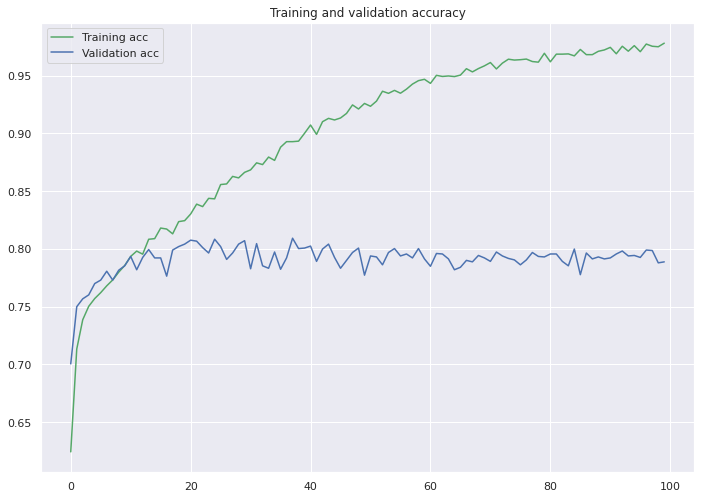

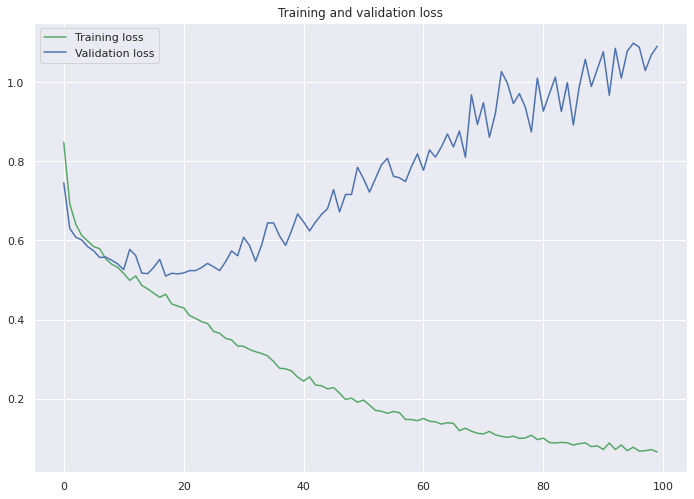

In [ ]:
# Plot train/test loss and accuracy.

acc = hist_1.history['acc']
val_acc = hist_1.history['val_acc']
loss = hist_1.history['loss']
val_loss = hist_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Observation:**

* Accuracy steadily increases to the point of overfitting in training but peaks at about 0.80 in validation.

* Loss decreases steadily in training but initially dips and then increases to an unacceptable level in validation.

In [ ]:
# Confusion matrix.

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


In [ ]:
# Get predicted values
y_pred = lstm_model1.predict(X_test)  # outputs probabilities of each sentiment
# Create empty numpy array to match length of training observations
y_pred_array = np.zeros(X_test.shape[0])

# Find class with highest probability
for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # column with max probability
    y_pred_array[i] = label_predict

# convert to integers
y_pred_array = y_pred_array.astype(int)

In [ ]:
# Convert y_test to 1d numpy array
y_test_array = np.zeros(X_test.shape[0])

# Find class with 1
for i in range(0, y_test.shape[0]):
    label_predict = np.argmax(y_test[i])
    y_test_array[i] = label_predict

y_test_array = y_test_array.astype(int)

In [ ]:
class_names = np.array(['Negative', 'Neutral', 'Positive'])

Confusion matrix, without normalization
[[1600  178   92]
 [ 186  362   66]
 [  70   50  324]]
Normalized confusion matrix
[[0.86 0.1  0.05]
 [0.3  0.59 0.11]
 [0.16 0.11 0.73]]


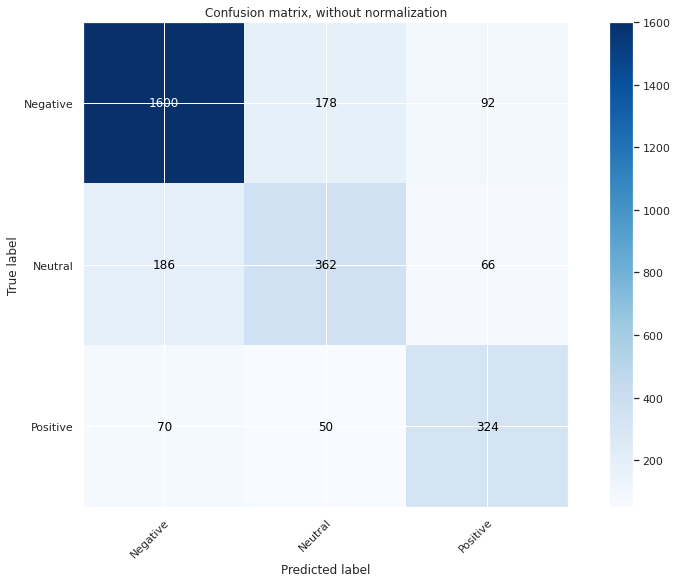

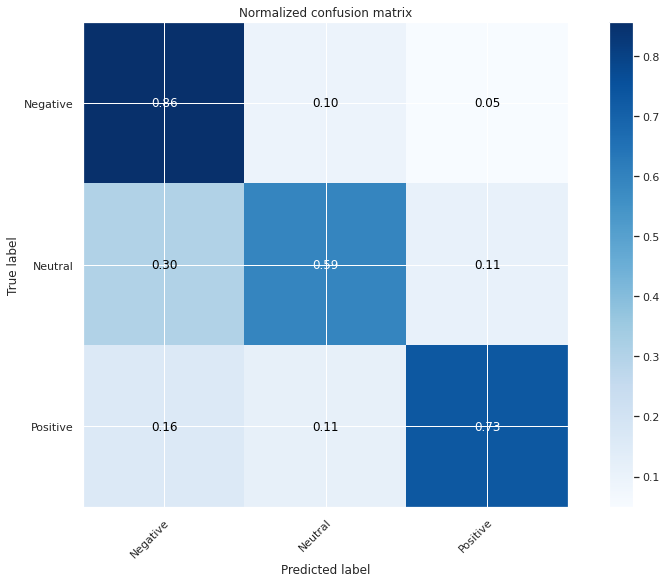

In [ ]:
# Create the function to plot the confusion matrix.

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot the non-normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot the normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Observations:**
<br>
We see in the above confusion matrices, Model 1 did an excellent job predicting a negative label when the tweet was negative but suffered more with predicting positive and neutral labels. This may be due to the fact that our training was largely comprised of negative tweets, so the model learned to give a higher probability to a negative label from this class imbalance.


**Model 2: LSTM with regularization and reduced dimensionality.**

In [ ]:
lstm_model2 = Sequential()
lstm_model2.add(embedding_layer)
lstm_model2.add(LSTM(64, 
               dropout = 0.2, 
               recurrent_dropout = 0.5))
lstm_model2.add(Dense(3, activation='softmax'))
lstm_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
lstm_model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 1,619,335
Trainable params: 42,435
Non-trainable params: 1,576,900
_________________________________________________________________


In [ ]:
hist_2 = lstm_model2.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 9s 162ms/step - loss: 0.8839 - acc: 0.6123 - val_loss: 0.8460 - val_acc: 0.6176
Epoch 2/100
37/37 [==============================] - 6s 151ms/step - loss: 0.8258 - acc: 0.6403 - val_loss: 0.7855 - val_acc: 0.6718
Epoch 3/100
37/37 [==============================] - 6s 151ms/step - loss: 0.7432 - acc: 0.6841 - val_loss: 0.7009 - val_acc: 0.7055
Epoch 4/100
37/37 [==============================] - 6s 151ms/step - loss: 0.6932 - acc: 0.7104 - val_loss: 0.6701 - val_acc: 0.7307
Epoch 5/100
37/37 [==============================] - 6s 152ms/step - loss: 0.6648 - acc: 0.7313 - val_loss: 0.6217 - val_acc: 0.7550
Epoch 6/100
37/37 [==============================] - 6s 152ms/step - loss: 0.6211 - acc: 0.7521 - val_loss: 0.5912 - val_acc: 0.7601
Epoch 7/100
37/37 [==============================] - 6s 152ms/step - loss: 0.6025 - acc: 0.7591 - val_loss: 0.5771 - val_acc: 0.7687
Epoch 8/100
37/37 [==============================] - 6s 152ms/step - 

In [ ]:
# Train and test accuracy
loss, accuracy = lstm_model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9170
Testing Accuracy:  0.7879


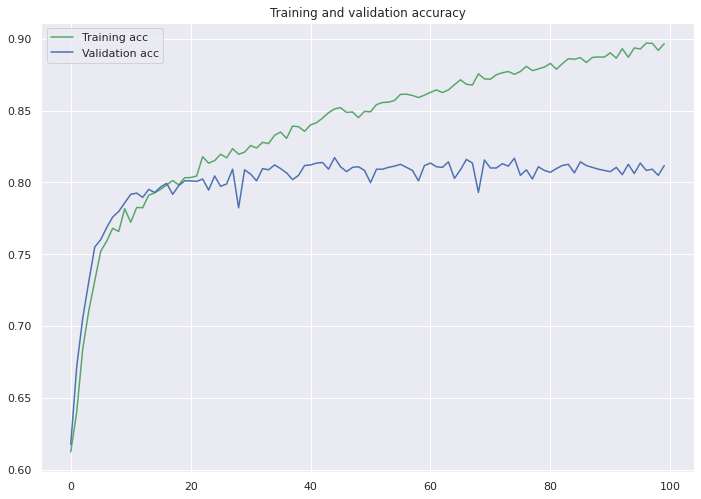

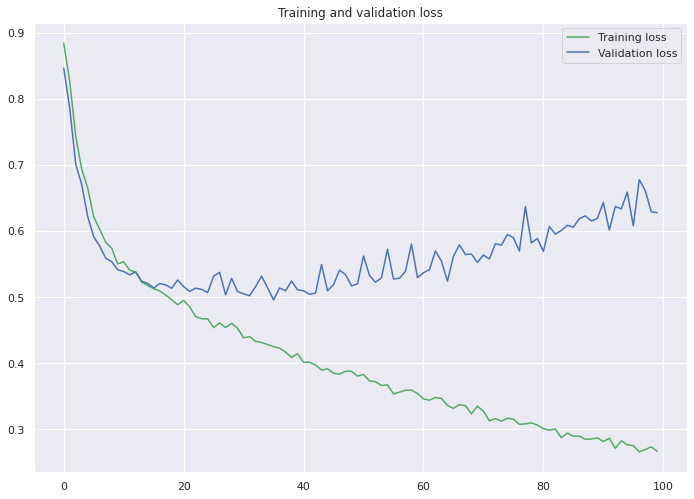

In [ ]:
# Plot train/test loss and accuracy
acc = hist_2.history['acc']
val_acc = hist_2.history['val_acc']
loss = hist_2.history['loss']
val_loss = hist_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Observation:**

* Accuracy steadily increases to the point of overfitting in training but peaks at about 0.80 in validation.

* Loss decreases steadily in training but initially dips and then increases to between 60% and 70%.

In [ ]:
# Get the predicted values.

y_pred = lstm_model2.predict(X_test)  # outputs probabilities of each sentiment
# Create empty numpy array to match length of training observations
y_pred_array = np.zeros(X_test.shape[0])

# Find the class with highest probability.

for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # column with max probability
    y_pred_array[i] = label_predict

# convert to integers
y_pred_array = y_pred_array.astype(int)


Confusion matrix, without normalization
[[1643  147   80]
 [ 195  349   70]
 [  74   55  315]]
Normalized confusion matrix
[[0.88 0.08 0.04]
 [0.32 0.57 0.11]
 [0.17 0.12 0.71]]


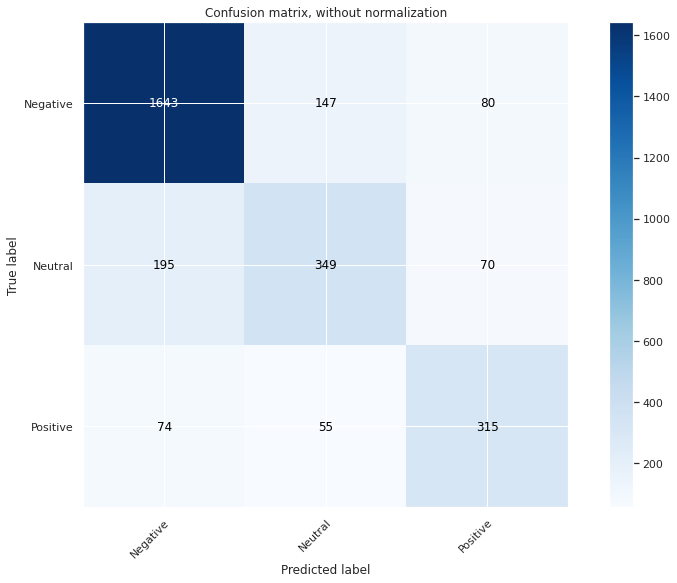

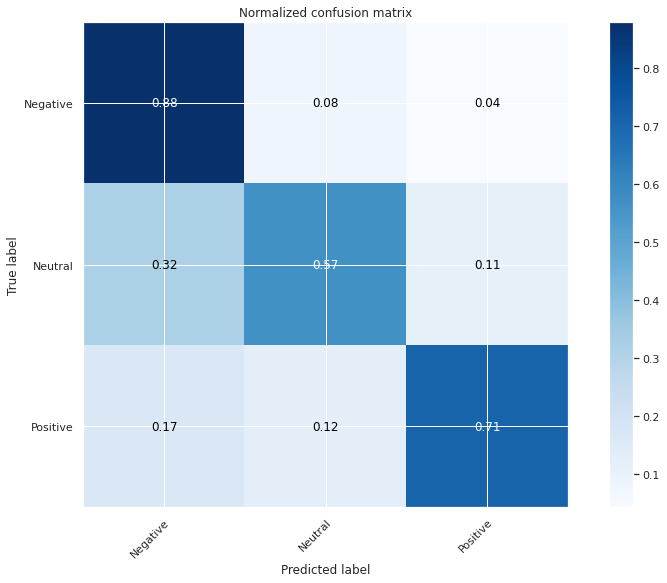

In [ ]:
np.set_printoptions(precision=2)

# Plot the non-normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot the normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Observations:**
<br>
We see in the above confusion matrices, Model 2 did an excellent job predicting a negative label when the tweet was negative but did not do as well with predicting positive and neutral labels. This may be due to the fact that our training was largely comprised of negative tweets, so the model learned to give a higher probability to a negative label from this class imbalance. Model 2 performed better than Model 1 with the positive and neutral labels but performed approximately as well as Model 1 with the negative lables.

**Model 3: LSTM Layer Stacking.**

In [ ]:
# LSTM Model.

lstm_model3 = Sequential()
lstm_model3.add(embedding_layer)
lstm_model3.add(LSTM(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5,
                 return_sequences = True))
lstm_model3.add(LSTM(128,
                dropout = 0.2,
                recurrent_dropout = 0.5))
lstm_model3.add(Dense(3, activation='softmax'))
lstm_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
lstm_model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 256)           365568    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 2,139,975
Trainable params: 563,075
Non-trainable params: 1,576,900
_________________________________________________________________


In [ ]:
# Neural network parameters.

history_3 = lstm_model3.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 48s 1s/step - loss: 0.8296 - acc: 0.6373 - val_loss: 0.7543 - val_acc: 0.6961
Epoch 2/100
37/37 [==============================] - 42s 1s/step - loss: 0.6983 - acc: 0.7153 - val_loss: 0.6344 - val_acc: 0.7405
Epoch 3/100
37/37 [==============================] - 42s 1s/step - loss: 0.6346 - acc: 0.7387 - val_loss: 0.6125 - val_acc: 0.7512
Epoch 4/100
37/37 [==============================] - 42s 1s/step - loss: 0.6151 - acc: 0.7494 - val_loss: 0.6198 - val_acc: 0.7537
Epoch 5/100
37/37 [==============================] - 42s 1s/step - loss: 0.6103 - acc: 0.7522 - val_loss: 0.5804 - val_acc: 0.7627
Epoch 6/100
37/37 [==============================] - 42s 1s/step - loss: 0.5837 - acc: 0.7588 - val_loss: 0.5634 - val_acc: 0.7746
Epoch 7/100
37/37 [==============================] - 42s 1s/step - loss: 0.5663 - acc: 0.7681 - val_loss: 0.5411 - val_acc: 0.7896
Epoch 8/100
37/37 [==============================] - 42s 1s/step - loss: 0.5590 - a

In [ ]:
# Find train and test accuracy.

loss, accuracy = lstm_model3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstm_model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9548
Testing Accuracy:  0.7862


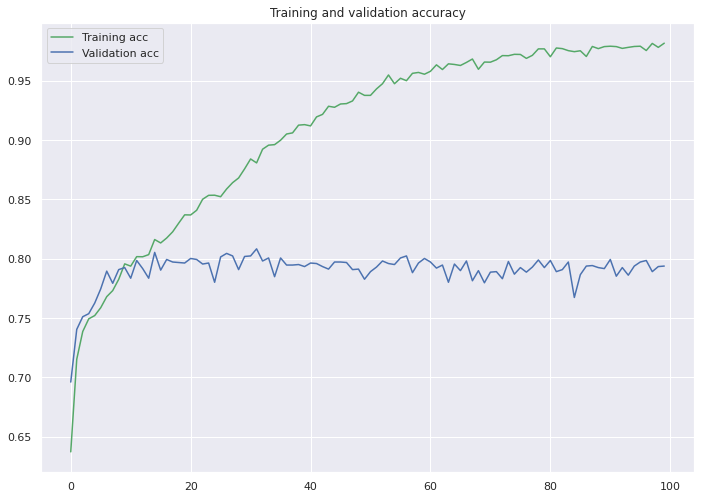

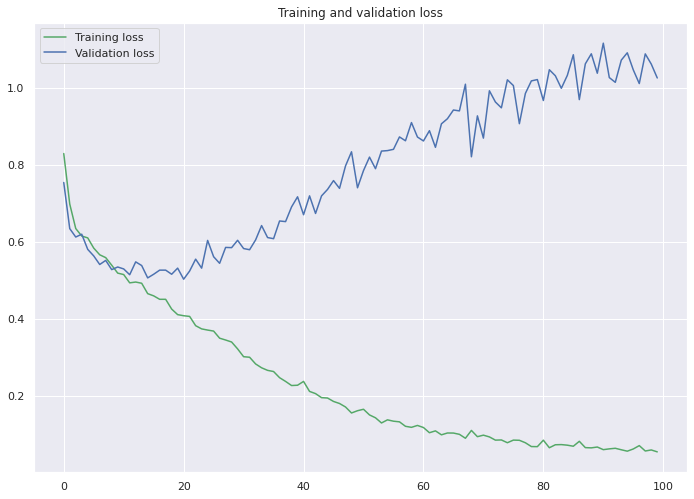

In [ ]:
# Plot train/test loss and accuracy.

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Observation:**

* Accuracy steadily increases to the point of overfitting in training but peaks at about 0.80 in validation.

* Loss decreases steadily in training but initially dips and then increases to over 100%. Not ideal.

In [ ]:
# Get the predicted values.

y_pred = lstm_model3.predict(X_test)  # Outputs probabilities of each sentiment.

# Create empty numpy array to match length of training observations.

y_pred_array = np.zeros(X_test.shape[0])

# Find the class with the highest probability.

for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # Column with max probability.
    y_pred_array[i] = label_predict

# Convert to integers.

y_pred_array = y_pred_array.astype(int)

Confusion matrix, without normalization
[[1650  142   78]
 [ 218  323   73]
 [  75   40  329]]
Normalized confusion matrix
[[0.88 0.08 0.04]
 [0.36 0.53 0.12]
 [0.17 0.09 0.74]]


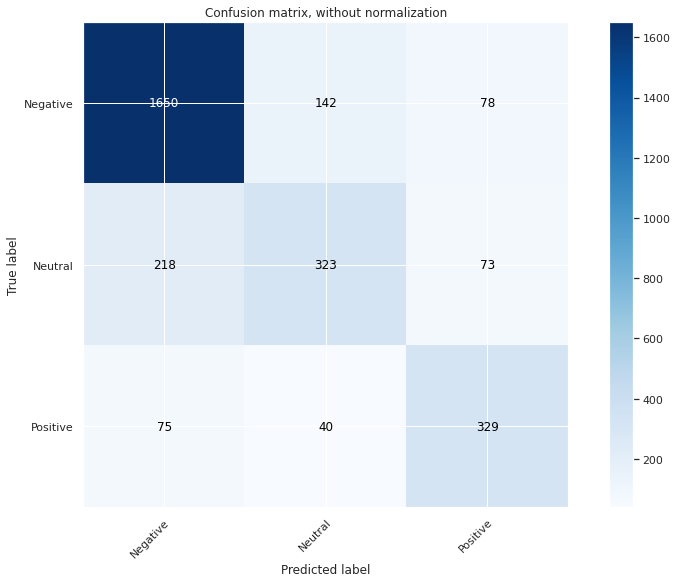

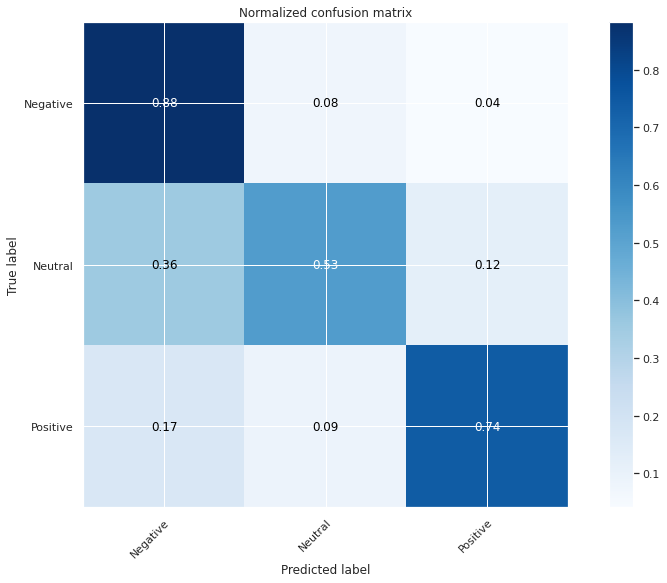

In [ ]:
np.set_printoptions(precision=2)

# Plot the non-normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot the normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Observations:**

We see in the above confusion matrices, Model 3 did an excellent job predicting a negative label when the tweet was negative but did not do as well with predicting positive and neutral labels. This may be due to the fact that our training was largely comprised of negative tweets, so the model learned to give a higher probability to a negative label from this class imbalance. Model 3 performed better than Model 2 with the positive and neutral labels but performed approximately as well as Model 2 with the negative lables.

**Model 4: GRU Layer Stacking.**

In [ ]:
# GRU Model: 

gru_model_4 = Sequential()
gru_model_4.add(embedding_layer)
gru_model_4.add(GRU(256, 
               dropout = 0.2, 
               recurrent_dropout = 0.5,
                 return_sequences = True))
gru_model_4.add(GRU(128,
                dropout = 0.2,
                recurrent_dropout = 0.5))
gru_model_4.add(Dense(3, activation='softmax'))
gru_model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
gru_model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
gru (GRU)                    (None, 30, 256)           274944    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 387       
Total params: 2,000,455
Trainable params: 423,555
Non-trainable params: 1,576,900
_________________________________________________________________


In [ ]:
# Tune the hyperparameters.

history_4 = gru_model_4.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 39s 938ms/step - loss: 0.8825 - acc: 0.6186 - val_loss: 0.8308 - val_acc: 0.6180
Epoch 2/100
37/37 [==============================] - 34s 917ms/step - loss: 0.7510 - acc: 0.6810 - val_loss: 0.7136 - val_acc: 0.6978
Epoch 3/100
37/37 [==============================] - 34s 920ms/step - loss: 0.6900 - acc: 0.7126 - val_loss: 0.6300 - val_acc: 0.7409
Epoch 4/100
37/37 [==============================] - 34s 919ms/step - loss: 0.6172 - acc: 0.7428 - val_loss: 0.5963 - val_acc: 0.7529
Epoch 5/100
37/37 [==============================] - 34s 920ms/step - loss: 0.5923 - acc: 0.7589 - val_loss: 0.5616 - val_acc: 0.7764
Epoch 6/100
37/37 [==============================] - 34s 922ms/step - loss: 0.5717 - acc: 0.7708 - val_loss: 0.5509 - val_acc: 0.7742
Epoch 7/100
37/37 [==============================] - 34s 929ms/step - loss: 0.5580 - acc: 0.7754 - val_loss: 0.5371 - val_acc: 0.7815
Epoch 8/100
37/37 [==============================] - 34s 922ms

In [ ]:
loss, accuracy = gru_model_4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = gru_model_4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9570
Testing Accuracy:  0.7770


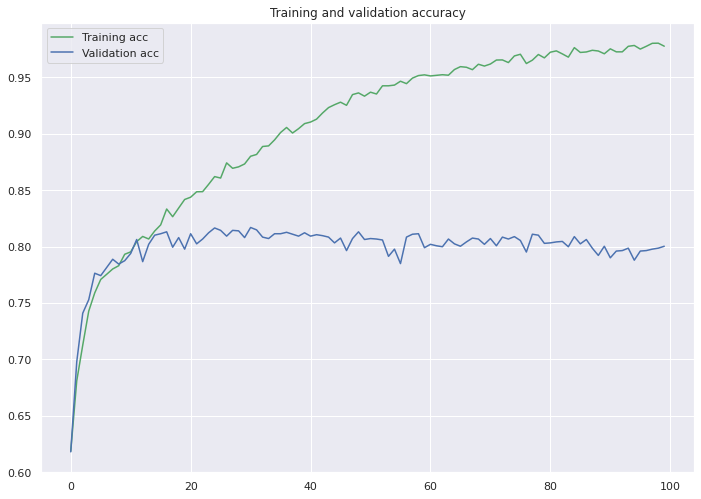

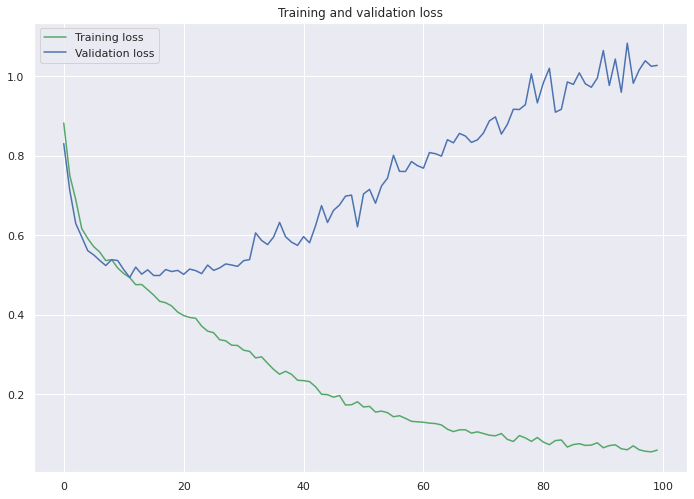

In [ ]:
acc = history_4.history['acc']
val_acc = history_4.history['val_acc']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Observation:**

* Accuracy steadily increases to the point of overfitting in training but peaks at about 0.80 in validation.

* Loss decreases steadily in training but initially dips and then increases to over 100%. Not ideal.

In [ ]:
# Get the predicted values.

y_pred = gru_model_4.predict(X_test)  # Outputs probabilities of each sentiment.

# Create empty numpy array to match length of training observations.

y_pred_array = np.zeros(X_test.shape[0])

# Find the class with highest probability.

for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # Column with max probability.
    y_pred_array[i] = label_predict

# C onvert to integers.

y_pred_array = y_pred_array.astype(int)


Confusion matrix, without normalization
[[1604  184   82]
 [ 197  353   64]
 [  64   62  318]]
Normalized confusion matrix
[[0.86 0.1  0.04]
 [0.32 0.57 0.1 ]
 [0.14 0.14 0.72]]


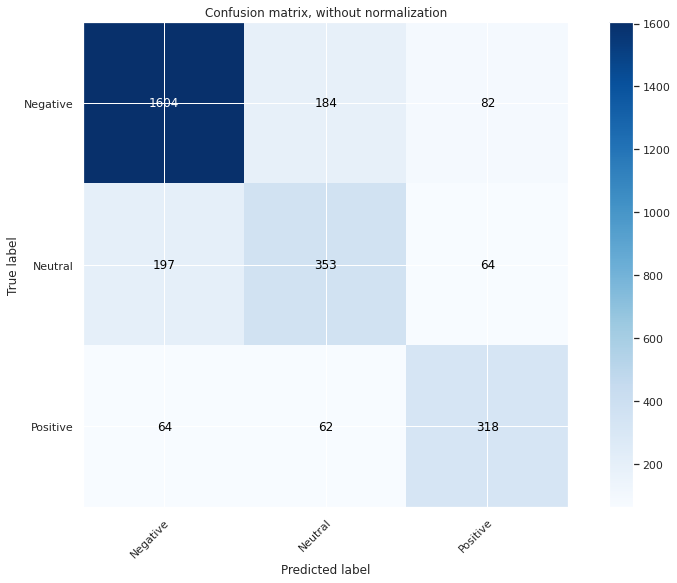

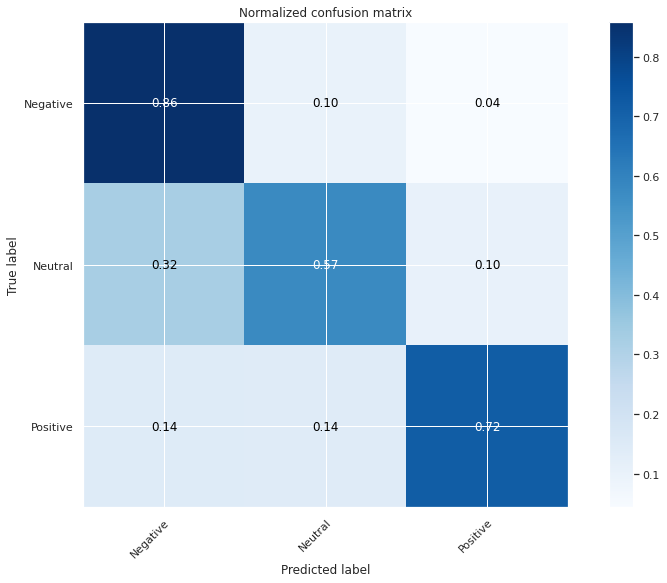

In [ ]:
np.set_printoptions(precision=2)

# Plot the non-normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot the normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Observations:**

We see in the above confusion matrices, Model 4 did an excellent job predicting a negative label when the tweet was negative but did not do as well with predicting positive and neutral labels. This may be due to the fact that our training was largely comprised of negative tweets, so the model learned to give a higher probability to a negative label from this class imbalance. Model 4 performed better than Model 3 with the neutral labels, a little worse with the positive labels, but performed approximately as well as Model 3 with the negative lables.

**Model 5: Reduced GRU with More Regularization.**

In [ ]:
# GRU Model:

gru_model_5 = Sequential()
gru_model_5.add(embedding_layer)
gru_model_5.add(GRU(64, 
               dropout = 0.3, 
               recurrent_dropout = 0.5,
                 return_sequences = True))
gru_model_5.add(GRU(32,
                dropout = 0.2,
                recurrent_dropout = 0.5))
gru_model_5.add(Dense(3, activation='softmax'))
gru_model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
gru_model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
gru_2 (GRU)                  (None, 30, 64)            31872     
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 1,618,279
Trainable params: 41,379
Non-trainable params: 1,576,900
_________________________________________________________________


In [ ]:
# Hyperparameters for the GRU Model.

history_5 = gru_model_5.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 13s 223ms/step - loss: 0.9068 - acc: 0.6203 - val_loss: 0.8596 - val_acc: 0.6176
Epoch 2/100
37/37 [==============================] - 8s 205ms/step - loss: 0.8451 - acc: 0.6270 - val_loss: 0.8275 - val_acc: 0.6470
Epoch 3/100
37/37 [==============================] - 8s 203ms/step - loss: 0.7920 - acc: 0.6628 - val_loss: 0.7152 - val_acc: 0.7055
Epoch 4/100
37/37 [==============================] - 8s 208ms/step - loss: 0.7090 - acc: 0.6991 - val_loss: 0.6720 - val_acc: 0.7183
Epoch 5/100
37/37 [==============================] - 8s 207ms/step - loss: 0.6728 - acc: 0.7225 - val_loss: 0.6353 - val_acc: 0.7452
Epoch 6/100
37/37 [==============================] - 8s 206ms/step - loss: 0.6506 - acc: 0.7334 - val_loss: 0.6217 - val_acc: 0.7606
Epoch 7/100
37/37 [==============================] - 8s 206ms/step - loss: 0.6220 - acc: 0.7457 - val_loss: 0.5821 - val_acc: 0.7717
Epoch 8/100
37/37 [==============================] - 8s 206ms/step -

In [ ]:
loss, accuracy = gru_model_5.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = gru_model_5.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.8963
Testing Accuracy:  0.7982


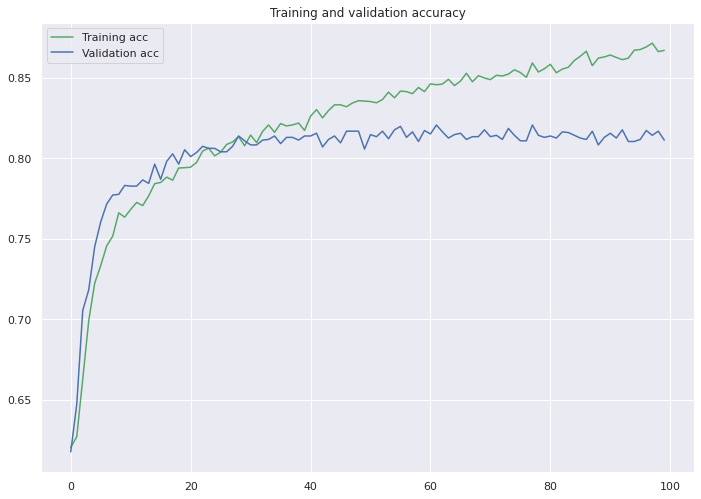

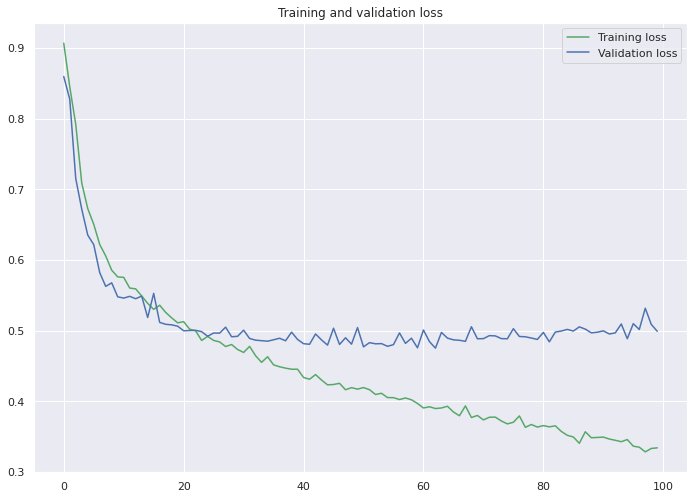

In [ ]:
acc = history_5.history['acc']
val_acc = history_5.history['val_acc']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Observation:**

* Accuracy steadily increases to the point of overfitting in training but peaks at about 0.80 in validation.

* Loss decreases steadily in training but initially dips and then levels out at about 50%.

In [ ]:
# Get the predicted values.

y_pred = gru_model_5.predict(X_test)  # Outputs probabilities of each sentiment.

# Create empty numpy array to match length of training observations.

y_pred_array = np.zeros(X_test.shape[0])

# Find class with highest probability.

for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # Column with max probability.
    y_pred_array[i] = label_predict

# Convert to integers.

y_pred_array = y_pred_array.astype(int)

Confusion matrix, without normalization
[[1618  173   79]
 [ 171  384   59]
 [  54   55  335]]
Normalized confusion matrix
[[0.87 0.09 0.04]
 [0.28 0.63 0.1 ]
 [0.12 0.12 0.75]]


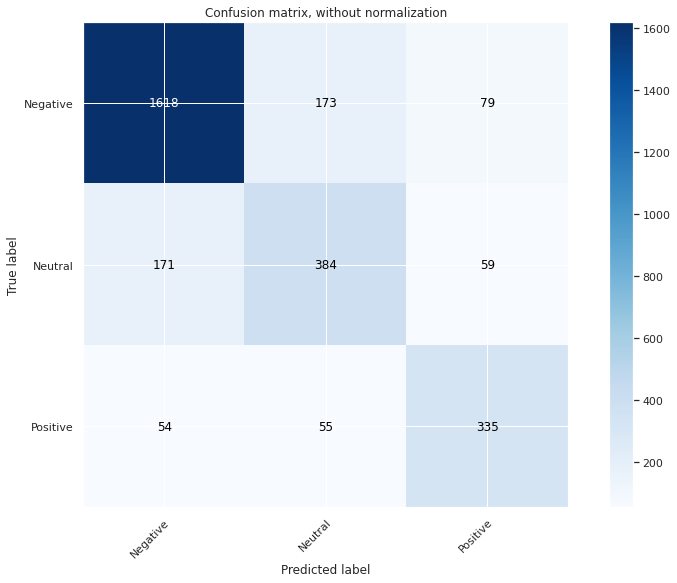

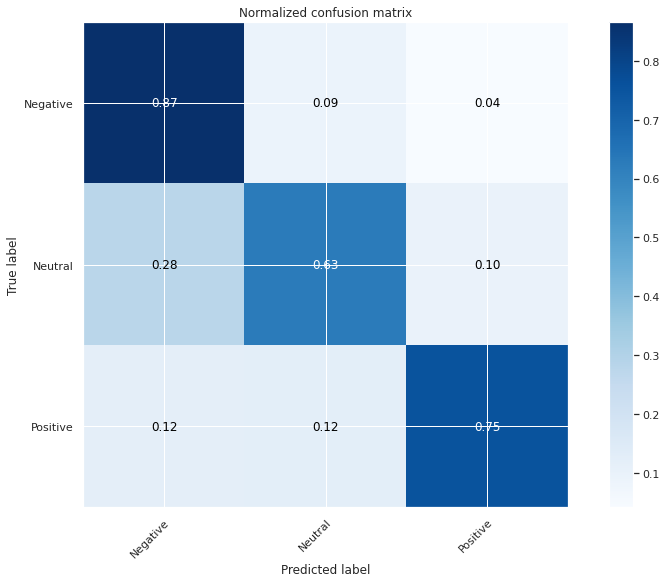

In [ ]:
np.set_printoptions(precision=2)

# Plot the non-normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot the normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**Observations:** 

We see in the above confusion matrices, Model 5 did an excellent job predicting a negative label when the tweet was negative but did not do as well with predicting positive and neutral labels. This may be due to the fact that our training was largely comprised of negative tweets, so the model learned to give a higher probability to a negative label from this class imbalance.

**Model 6: Bidirectional RNN.**

Recurrent Neural Network (RNN):

Unlike feedforward networks that process each input individually and independently, a RNN creates loops between each node in the neural network. This makes it particularly good for sequential data, such as text. It is able to process sequences and create a state which contains information about what the network has seen so far. This is why RNNs are useful for natural language processing, because sentences are decoded word-by-word while keeping memory of the words that came beforehand to give better context for understanding. A RNN allows information from a previous output to be fed as input into the current state. Simply put, we can use previous information to help make a current decision.

<br>

Bidirectional RNNs:

In general, RNNs tend to be order or time dependent. They process the time steps in a sequential, unidirectional order. On the other hand, a bidirectional RNN is able to process a sequence in both directions which means it may be able to pick up patterns that would not be noticed using a unidirectional model. Therefore, this type of model is able to improve performance on problems that have a chronological order.

In [ ]:
# Import the Tensorflow Biderectional RNN library.

from tensorflow.keras.layers import Bidirectional

In [ ]:
# Bidirectional RNNs.

bdrnn_model_6 = Sequential()
bdrnn_model_6.add(embedding_layer)
bdrnn_model_6.add(Bidirectional(LSTM(64,
                              dropout=0.2,
                              recurrent_dropout=0.5)))
bdrnn_model_6.add(Dense(3,activation='softmax'))
bdrnn_model_6.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1576900   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 387       
Total params: 1,661,767
Trainable params: 84,867
Non-trainable params: 1,576,900
_________________________________________________________________


In [ ]:
bdrnn_model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Tune the hyperparameters.

history_6 = bdrnn_model_6.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100, batch_size=256)

Epoch 1/100
37/37 [==============================] - 16s 306ms/step - loss: 0.8506 - acc: 0.6288 - val_loss: 0.7821 - val_acc: 0.6697
Epoch 2/100
37/37 [==============================] - 11s 292ms/step - loss: 0.7150 - acc: 0.7110 - val_loss: 0.6520 - val_acc: 0.7405
Epoch 3/100
37/37 [==============================] - 11s 291ms/step - loss: 0.6371 - acc: 0.7419 - val_loss: 0.6592 - val_acc: 0.7452
Epoch 4/100
37/37 [==============================] - 11s 290ms/step - loss: 0.6040 - acc: 0.7523 - val_loss: 0.5920 - val_acc: 0.7700
Epoch 5/100
37/37 [==============================] - 11s 291ms/step - loss: 0.5817 - acc: 0.7644 - val_loss: 0.5645 - val_acc: 0.7772
Epoch 6/100
37/37 [==============================] - 11s 290ms/step - loss: 0.5714 - acc: 0.7677 - val_loss: 0.5710 - val_acc: 0.7691
Epoch 7/100
37/37 [==============================] - 11s 291ms/step - loss: 0.5630 - acc: 0.7720 - val_loss: 0.5748 - val_acc: 0.7789
Epoch 8/100
37/37 [==============================] - 11s 290ms

In [ ]:
loss, accuracy = bdrnn_model_6.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = bdrnn_model_6.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9472
Testing Accuracy:  0.7814


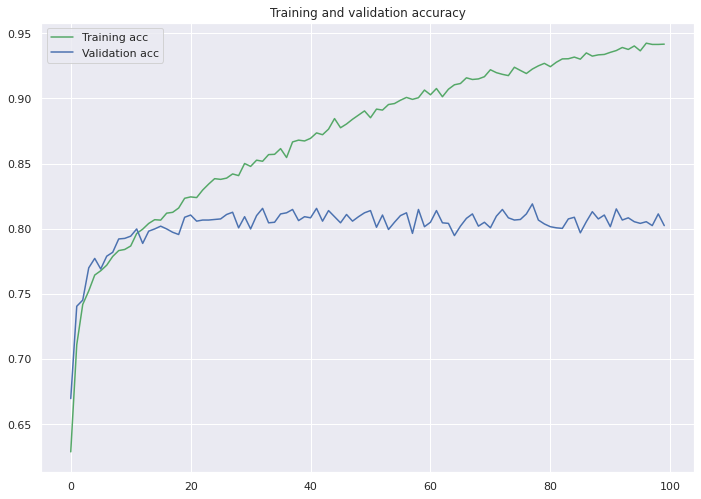

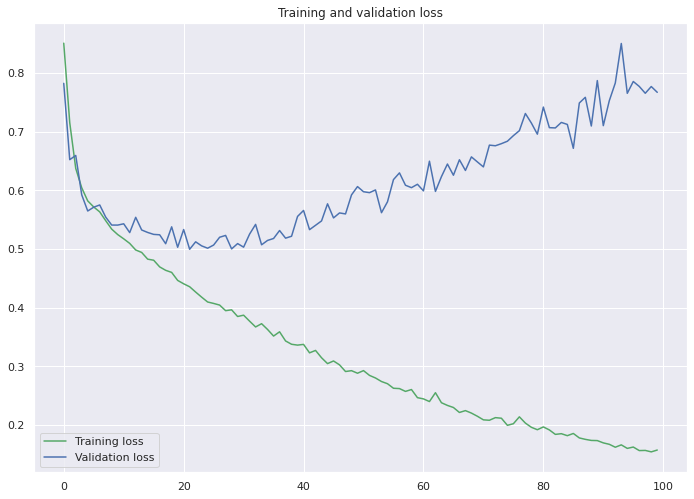

In [ ]:
acc = history_6.history['acc']
val_acc = history_6.history['val_acc']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Observation:**

* Accuracy steadily increases to the point of overfitting in training but peaks at about 0.80 in validation.

* Loss decreases steadily in training but initially dips and then ascends to around 80%. Not ideal.

In [ ]:
# Get the predicted values.

y_pred = bdrnn_model_6.predict(X_test)  # Outputs probabilities of each sentiment.

# Create empty numpy array to match length of training observations.

y_pred_array = np.zeros(X_test.shape[0])

# Find the class with highest probability.

for i in range(0, y_pred.shape[0]):
    label_predict = np.argmax(y_pred[i]) # Column with max probability.
    y_pred_array[i] = label_predict

# Convert to integers.
y_pred_array = y_pred_array.astype(int)


Confusion matrix, without normalization
[[1605  201   64]
 [ 185  384   45]
 [  78   67  299]]
Normalized confusion matrix
[[0.86 0.11 0.03]
 [0.3  0.63 0.07]
 [0.18 0.15 0.67]]


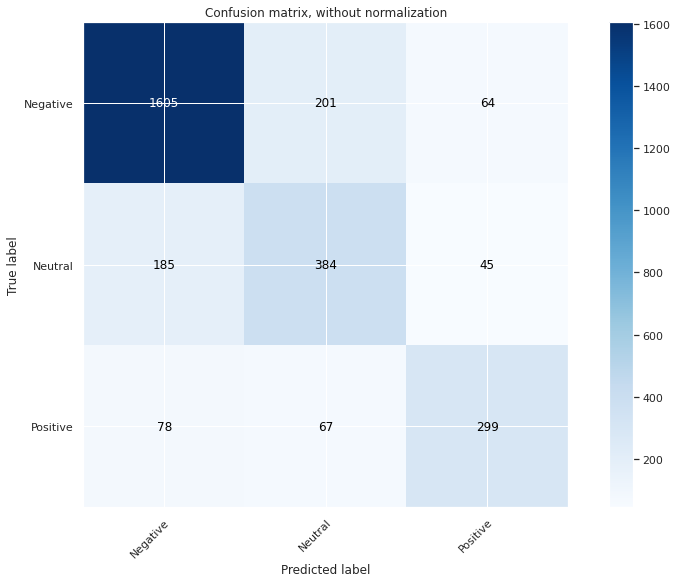

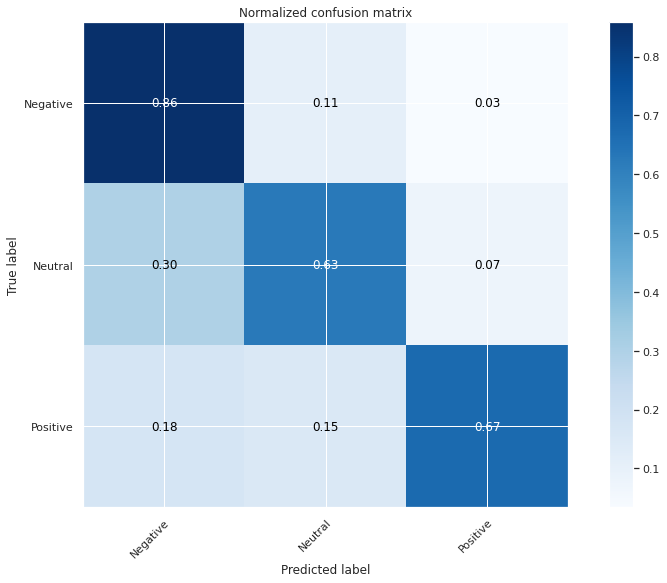

In [ ]:
np.set_printoptions(precision=2)

# Plot the non-normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot the normalized confusion matrix.

plot_confusion_matrix(y_test_array, y_pred_array, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


**Observations:**

We see in the above confusion matrices, Model 6 did an excellent job predicting a negative label when the tweet was negative but did not do as well with predicting positive and neutral labels. This may be due to the fact that our training was largely comprised of negative tweets, so the model learned to give a higher probability to a negative label from this class imbalance. 

# **Summary.**

* On Saturday February 22nd 2015 and Sunday February 23rd 2015, there was a bad weekend storm which dumped snow, sleet, and ice across the South and Eastern United States from Saturday into Sunday. At least 21 people died in Tennessee from storm-related fatalities, including hypothermia, as Gov. Bill Haslam (R) upgraded the state of emergency there to Level 2. Further north, Washington, D.C., and New York City each saw about five inches of snow, while snowed-in Boston received about another inch of powder. These events most likely had an impact on the types of tweets that we noticed peaked in that time frame.

<br>

* We see that in the positive word cloud, many positive words such as “love”, “amazing”, “thank”, and “fantastic” can be seen. This greatly contrasts the negative word cloud which has words such as “cancelled” and “delay”. The neutral world cloud seems to lack these emotionally polarizing words.

<br>

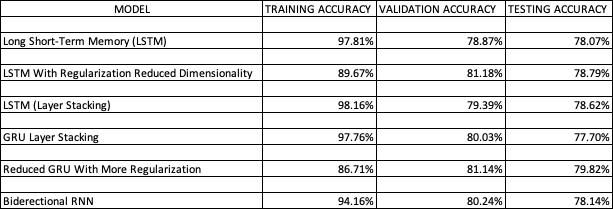

<br>

* From our analysis, it seems that Reduced GRU With More Regularization is the best RNN to classify the sentiment of tweets. It does a better job at classifying both neutral and positive tweets compared to our other models. Therefore, it will better generalize to a different dataset that is less overwhelmingly comprised of negative tweets.

<br>

* More hyperparameter tuning and optimization is needed to better train the models. Training the neural networks for longer with more epochs and perhaps different batch sizes, learning rates, drop outs etc. may produce improved accuracy outcomes?

<br>

* Removing words like "flight" as a stopword may strengthen the sentiment analysis models because the word appears very frequently in all 3 classifications of the customers sentiment and most likely introduces "noise" into the dataset; it is neither a postive, negative, nor neutral word.





# **References.**

https://theweek.com/10things/536518/10-things-need-know-today-february22-2015

<br>

https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/master/Chapter12/.ipynb_checkpoints/Ch-12-checkpoint.ipynb

<br>

https://nlp.stanford.edu/projects/glove/

<br>

https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

<br>

https://realpython.com/python-keras-text-classification/

<br>

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<br>

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

<br>


# **Extra:**

In [ ]:
df_Tweets_Stop = df_Tweets_Orig.copy()

In [ ]:
df_Tweets_Stop = df_Tweets_Stop[["text","airline_sentiment"]]

In [ ]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
df_Tweets_Stop['text'] = df_Tweets_Stop['text'].apply(lambda x: clean_text(x))
df_Tweets_Stop.head(15)

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative
5,seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,negative
6,"yes, nearly every time I fly VX this “ear worm” will not go away :)",positive
7,"Really missed a prime opportunity for Men Without Hats parody, there.",neutral
8,"Well, I did not…but NOW I DO! :-D",positive
9,"it was amazing, and arrived an hour early. you are too good to me.",positive


In [ ]:
df_Tweets_Stop['text'] = df_Tweets_Stop.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df_Tweets_Stop.head(15)

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative
5,"[seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]",negative
6,"[yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]",positive
7,"[Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, .]",neutral
8,"[Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]",positive
9,"[it, was, amazing, ,, and, arrived, an, hour, early, ., you, are, too, good, to, me, .]",positive


In [ ]:
# This adds the word "flight" to the list of stopwords and effectively removes it from our 
# sentiment dataset for the purposes of model building.

stopwords.append('flight')  

lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags
def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df_Tweets_Stop['text'] = df_Tweets_Stop.apply(lambda row: normalize(row['text']), axis=1)

In [ ]:
df_Tweets_Stop.head(15)

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative
5,seriously would pay seat play really bad thing fly va,negative
6,yes nearly every time fly vx ear worm go away,positive
7,really miss prime opportunity men without hat parody,neutral
8,well notbut,positive
9,amaze arrive hour early good,positive


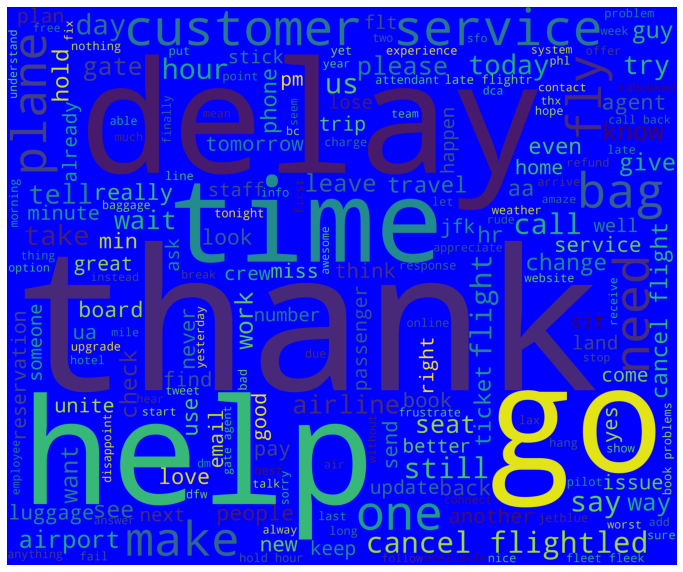

In [ ]:
# importing all necessary modules 

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
 
stopword_list = set(STOPWORDS) 

word_lists = df_Tweets_Stop['text']
unique_str  = ' '.join(word_lists)

#generate_wordcloud(unique_str)

word_cloud = WordCloud(width = 3000, height = 2500, 
                       background_color ='blue', 
                       stopwords = stopword_list, 
                       min_font_size = 10).generate(unique_str) 

# Visualize the WordCloud Plot

# Set wordcloud figure size

plt.figure(1,figsize=(12, 12)) 

# Show image

plt.imshow(word_cloud) 

# Remove Axis

plt.axis("off")  

# show plot

plt.show()



**Observation:**
<br>
The word "flight" is no longer present in the dataset.

**Feature Generation using CountVectorizer.**

In [ ]:
# Import CountVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

 
# Create Regex tokenizer for removing special symbols and numeric values 
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
 
# Initialize CountVectorizer object
count_vectorizer = CountVectorizer(lowercase=True, 
                     stop_words='english', 
                     ngram_range = (1,1), 
                     tokenizer = regex_tokenizer.tokenize)
 
# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df_Tweets_Stop['text'])

**Split train and test.**

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split
 
# Partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    count_vectors, df_Tweets_Stop['airline_sentiment'], test_size=0.3, random_state=1)

**Classification Model Building using Logistic Regression.**

In [ ]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

**Evaluate the Classification Model.**

In [ ]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))


Logistic Regression Model Accuracy: 0.7748178506375227


**Classification using TF-IDF.**

In [ ]:
# Import TfidfVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Regex tokenizer for removing special symbols and numeric values 
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
 
# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = regex_tokenizer.tokenize)
 
# Fit and transform the dataset
text_tfidf= tfidf.fit_transform(df_Tweets_Stop['text'])

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split
 
# Partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    text_tfidf, df_Tweets_Stop['airline_sentiment'], test_size=0.3, random_state=1)

In [ ]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

In [ ]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))


Logistic Regression Model Accuracy: 0.7693533697632058


**Observation:**

Removing the word "flight" did not improve the accuracy scores using both Logistic Regression and TF-IDF models. It remains approximately 77%.